<a id='back'></a>
# Table Of Contents

* [Intro](#intro)
* [Step 1. General Information](#step1)
     * [1.1 Data initialization](#step1.1)
* [Step 2. Preparing Data](#step2)
     * [2.1 Column name](#step2.1)
     * [2.2 Column 'platform'](#step2.2)
     * [2.3 Column 'name'](#step2.3)
     * [2.4 Column 'year_of_release'](#step2.4)
     * [2.5 Column 'genre'](#step2.5)
     * [2.6 Column 'critic_score'](#step2.6)
     * [2.7 Column 'user_score'](#step2.7)
     * [2.8 'rating' column](#step2.8)
     * [2.9 Calculating total sales](#step2.9)
* [Step 3. Process of Analyzing Data](#step3)
     * [3.1 Game Releases Per Year](#step3.1)
     * [3.2 Sales Variations for Each Platform](#step3.2)
     * [3.3 Platform with the largest total sales and distribution](#step3.3)
     * [3.4 Platform has sales up](#step3.4)
     * [3.5 Select several platforms that have the potential to generate profits](#step3.5)
     * [3.6 Global Sales](#step3.6)
     * [3.7 The influence of user and professional reviews on sales](#step3.7)
     * [3.8 Compare Sales of the Same Game on Other Platforms](#step3.8)
     * [3.9 Most Profitable Genres](#step3.9)
* [Step 4. Profiling Users For Each Region](#step4)
     * [4.1 Top 5 Platforms](#step4.1)
     * [4.2 Top 5 Genres](#step4.2)
     * [4.3 ESRB Rating](#step4.3)
* [Step 5. Hypothesis Testing](#step5)
     * [5.1 Average user ratings of Xbox One and PC platforms are the same](#step5.1)
     * [5.2 Average user rating of different Action and Sports genres ](#step5.2)
* [Step 6. General Conclusion](#step6)

<a id='intro'></a>
## Introduction

<br>**Project description**
<br>You work at the online store "Ice" which sells video games from all over the world. Data related to user and expert game reviews, genre, platform (e.g., Xbox or PlayStation), and historical game sales data are available from open sources. You need to identify patterns that determine whether a game can be said to be successful or not. That way, you can find the games with the most potential and plan their advertising campaigns.


<br>In front of you is data from 2016. Try to imagine that now it is December 2016 and you are planning a campaign for 2017.


<br>(The most important thing is to gain experience in working with data. It doesn't matter whether you forecast sales for 2017 based on data from 2016 or forecast sales for 2027 based on data from 2026.).


<br>This dataset contains the abbreviation ESRB. ESRB is an abbreviation for Entertainment Software Rating Board, which is an independent regulatory organization that evaluates game content and assigns age ratings such as Teen or Mature.
Instructions for completing the project


<br>**Destination**
Identify patterns that determine the success of a game, create user profiles for each target market, and conduct hypothesis testing


[Back to Content](#back)

<a id='step1'></a>
## Step 1. General Information

<a id='step1.1'></a>
**1.1 Data initialization**
<br>*Import required libraries*

In [1]:
from collections import Counter
from matplotlib.patheffects import withStroke
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
import seaborn as sns

*Load data*

In [2]:
games = pd.read_csv('/datasets/games.csv')
games.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<br>This code reads data from a CSV file called "games.csv" and then displays information about the structure and data type of the DataFrame that was read.

1. games = pd.read_csv('/datasets/games.csv'): This reads data from the CSV file "games.csv" into a DataFrame stored in the games variable. The Pandas module is used to read data from a CSV file into a DataFrame.

2. games.info(): This is a call to the info() method on the games DataFrame, which provides information about the DataFrame structure, including data type, number of entries (rows), and number of non-nulls (non-blanks) in each column.
     Output from games.info():
     The DataFrame has 16,715 entries (rows) and 11 columns.
     Each column has a data type, such as float64 (for numeric data) or object (for text data).
     Some columns have less than the total number of entries with non-null values, indicating the presence of missing values (NaN) in the dataset.

<br>Information about the columns:
- Columns "Name", "Genre", and "Year_of_Release" have some missing values (non-null count less than number of entries).
- Columns such as "Critic_Score", "User_Score", and "Rating" have many missing values (non-null count is much lower than the number of entries), indicating the presence of many missing values (NaN) in these columns.

*Perform inspection*

In [3]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [4]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [5]:
games.duplicated().sum()

0

In [6]:
games.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

In [7]:
games.shape

(16715, 11)

In [8]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<br>This code performs descriptive analysis and checks the data contained in the "games" DataFrame.

1. games.describe(): This method provides summary descriptive statistics for numeric columns in a DataFrame, such as number of entries, mean, standard deviation, minimum value, quartiles, and maximum value.
Summary statistics for numeric columns:
- "Year_of_Release": Number of entries (count), average (mean), standard deviation (std), minimum value (min), lower quartile (25%), median (50%), upper quartile (75%), and maximum value (max).
- "NA_sales", "EU_sales", "JP_sales", "Other_sales": Similar statistics to "Year_of_Release" for sales in North America, Europe, Japan and other regions.
- "Critic_Score": Similar statistics to critic scores.
    
2. games.isna().sum(): This method calculates the number of missing values (NaN) in each column of the DataFrame.
Number of missing values (NaN) in each column:
- Columns "Name" and "Genre" have 2 missing values.
- Column "Year_of_Release" has 269 missing values.
- The "Critic_Score" column has 8,578 missing values.
- The "User_Score" column has 6,701 missing values.
- The "Rating" column has 6,766 missing values.

3. games.duplicated().sum(): This method counts the number of rows that are duplicates of existing data. Number of rows that are duplicates: There are no duplicates in the data, because the result is 0. Each row is unique.

<b>Steps to Fix the Problem</b>
<br>The analysis presented shows several common problems associated with the dataset. Here are the steps to fix it:

1. Missing Data (NaN) Handling:
- Name, Genre, and Year_of_Release: You can decide whether to delete rows with missing values or fill in missing values with appropriate data or reasonable estimates.
- Critic_Score, User_Score, and Rating: Choices depend on your analysis goals. You may decide to fill in the missing values with the mean or median of the column, or with another approach such as interpolation.

2. Resolving Inappropriate Data Types:
- User_Score and Rating: These columns should have a numeric data type (float or int) rather than object (string). You need to change this data type to numeric after handling missing values.

3. Understand Columns whose Meaning is Unclear:
- Some columns such as "NA_sales," "EU_sales," "JP_sales," "Other_sales" appear to represent sales in certain regions. Check that the values in this column make sense and are consistent with the dataset description. Adjust if necessary.

    
<br>After making these improvements, you can start analyzing your data better, including creating visualizations, calculating additional statistics, and modeling the data according to your needs. Make sure to run these steps in your notebook or Python script and integrate these changes into the games DataFrame.

[Back to Content](#back)

<a id='step2'></a>
## Step 2. Prepare Data

<a id='step2.1'></a>
### 2.1 Column name

In [9]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [10]:
games.columns = games.columns.str.lower()
games.columns 

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<br>The code games.columns = games.columns.str.lower() changes all column names in the games DataFrame to lowercase. The result of this operation is a change in column names according to lowercase letters.
    
<br>After this change, column names which previously may have been in capital letters or a mixture of upper and lower case letters, are now all in lower case. This makes it easier to access and process data consistently.

<a id='step2.2'></a>
### 2.2 'platform' column

In [11]:
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [12]:
games['platform'] = games['platform'].str.lower()
games['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

<br>The code games['platform'] = games['platform'].str.lower() does two main things:

1. Change the data in the 'platform' column to lowercase:
<br>games['platform'].str.lower() changes all data in the 'platform' column to lowercase. This helps ensure consistency and ease of data access.
2. Retrieving Unique Values from 'platform' Column:
<br>games['platform'].unique() is used to get the unique value in the 'platform' column after changing it to lowercase.

    
<br>The result is an array containing the unique values of the 'platform' column after converting them to lowercase. In the context of video game data, 'platform' refers to the console or system on which the game is available. Here are some of the platforms identified:
<br>Nintendo: 'wii', 'nes', 'gb', 'ds', 'snes', 'gba', '3ds', 'n64', 'gc'.
<br>Sony PlayStation: 'ps3', 'ps2', 'ps4', 'ps', 'psp', 'psv'.
<br>Xbox: 'x360', 'xb', 'xone'.
<br>PC: 'pc'.
<br>And some other platforms like '2600', 'wiiu', 'gen' (Sega Genesis), 'dc' (Dreamcast), 'sat' (Sega Saturn), etc.

    
<br>Platform data that has been converted into lowercase letters and taken for unique values makes it easier to further analyze or group data based on platform.

<a id='step2.3'></a>
### 2.3 Column 'name'

In [13]:
games['name'] = games['name'].str.lower()
games['name'].unique()

array(['wii sports', 'super mario bros.', 'mario kart wii', ...,
       'woody woodpecker in crazy castle 5', 'lma manager 2007',
       'haitaka no psychedelica'], dtype=object)

<br>The code games['name'] = games['name'].str.lower() does two main things:

1. Change the data in the 'name' column to lowercase:
<br>games['name'].str.lower() is used to change all data in the 'name' column (name of the game) to lower case. This helps ensure consistency and ease of data access.
2. Retrieving Unique Values from 'name' Column:
<br>games['name'].unique() is used to get the unique value in the 'name' column after changing it to lowercase.
    
<br>With game name data that has been converted to lowercase and its unique value, you can carry out further analysis or group data based on game names more easily.

<b>Steps to Fix the Problem</b>
<br>We can see the entry: 'mario kart wii'. The name contains platform. We have to proceed based on the assumption that there are other entries that also include their platform in their name. Later, we will analyze how the game performs across platforms, so we need games that have the same name across platforms. Knowing that Mario Kart is on other platforms also helps. We will write a function that checks if the game name has a platform in it and if it does, it will remove it from the name. Since we have missing values, we will use a try-except block. In the try block we will store the code that will try to run if everything is fine. If it cannot be executed (such as if there is a missing value), the code we will store in the except block will be executed

In [14]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [15]:
# List of platforms
platforms = games['platform'].unique()

# Function to remove platform name from game name
def remove_platform_name(game_name):
     if isinstance(game_name, str): # Only process if game name is a string
         tokens = nltk.word_tokenize(game_name.lower()) # Tokenization and conversion to lowercase
         cleaned_tokens = [token for token in tokens if token not in platforms]
         return ' '.join(cleaned_tokens)
     else:
         return game_name # Return value if not a string

# Use the function to remove the platform name from the 'name' column
games['name'] = games['name'].apply(remove_platform_name)

# Removes whitespace that may remain after replacement
games['name'] = games['name'].str.strip()

In [16]:
# Checking the function results
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,sports,wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros .,nes,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart,wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,sports resort,wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<br># Remove the name 'platform' from the 'name' column
<br>for platform in games['platform'].unique():
<br> games['name'] = games['name'].str.replace(platform, '')
<br>
<br># Removes whitespace that may remain after replacement
<br>games['name'] = games['name'].str.strip()

    
<br>Please note that this deletion does not take into account words similar to the platform name. For example, if the platform name is 'pc', words like 'epic' will be removed because they contain the substring 'pc'. So I wanted to do a more thorough deletion and take a more complex approach, using natural language processing (NLP) techniques.

<br>The name 'platform' in the 'name' column has disappeared

<a id='step2.4'></a>
### 2.4 Column 'year_of_release'

In [17]:
# Count the number of missing values (NaN) in 'year_of_release'
sum_nan_year_of_release = games['year_of_release'].isna().sum()

# Total number of entries in column 'year_of_release'
total_entries = len(games)

# Calculate the percentage of missing values (NaN) in 'year_of_release'
percentage_nan_year_of_release = (sum_nan_year_of_release / total_entries) * 100

print('Percentage of missing values (NaN) in column year_of_release:', percentage_nan_year_of_release, '%')

Percentage of missing values (NaN) in column year_of_release: 1.609332934489979 %


In [18]:
# Replace NaN values with 0 in column 'year_of_release'
games['year_of_release'].fillna(0, inplace=True)

# Checking changes
games['year_of_release'].isna().sum()

0

In [19]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<b>Explanation</b>
<br>

1. Analyze Percentage of Missing Values in 'year_of_release' Column:
- It was found that around 1.61% of the total entries in the 'year_of_release' column had missing values (NaN).
2. Replacing NaN Values with 0 in Column 'year_of_release':
- You decide to replace the NaN values in the 'year_of_release' column with 0.
3. DataFrame Information Update:
- After performing the replacement, you check the DataFrame information again.

    
<br>It was discovered that the 'year_of_release' column no longer has missing values, all NaN values have been replaced with 0, and the data type of this column is float64.
Replacing NaN values with 0 in the 'year_of_release' column may be useful to ensure that you have complete data and can better perform further analysis. However, the decision to use 0 in place of a NaN value depends on the context of the data and whether this is an appropriate representation for a nonexistent or unrecorded value

<a id='step2.5'></a>
### 2.5 'genre' column

In [20]:
games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [21]:
games['genre'] = games['genre'].str.lower()
games['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy', nan], dtype=object)

<br>In this section, you perform transformations on the 'genre' column with several steps:

1. Viewing Unique Values in the 'genre' Column:
<br>By using games['genre'].unique(), you see the unique values contained in the 'genre' column. These values cover various game genres such as 'Sports', 'Platform', 'Racing', 'Role-Playing', etc., including null (nan) values.
2. Changing the Genre to Lowercase:
<br>You use games['genre'] = games['genre'].str.lower() to change all values in the 'genre' column to lowercase. This helps in ensuring consistency in writing and makes analysis easier as it treats 'Genre' and 'genre' as the same value.
3. Seeing Unique Value After Transformation:
<br>By using games['genre'].unique() again, you ensure that all values in the 'genre' column have now been converted to lowercase.
The result of this transformation is the 'genre' column which has been converted to lowercase for consistency and ease of analysis. Now, game genres will be represented in a uniform lowercase format.

In [22]:
games['genre'].isna().sum()

2

In [23]:
games['genre'] = games['genre'].fillna('undefined')
games['genre'].isna().sum()

0

<br>In this section, you handle missing values (NaN) in the 'genre' column. Here are the steps explained:

1. Calculating the Number of Missing Values in the 'genre' Column:
<br>By using games['genre'].isna().sum(), you calculate the number of missing values (NaN) in the 'genre' column. The result is 2, meaning there are two missing values in the 'genre' column.
2. Filling Missing Values with 'undefined':
<br>You use games['genre'] = games['genre'].fillna('undefined') to replace missing values (NaN) with the string 'undefined'. By doing this, any missing values in the 'genre' column are filled with 'undefined'.
3. Rechecking the Number of Missing Values after Filling:
<br>By using games['genre'].isna().sum() again, you ensure that there are no more missing values (sum of null values = 0) after filling with the string 'undefined'.

    
<br>The result of these steps is that now the missing values in the 'genre' column have been filled with the string 'undefined', and there are no more missing values in that column. This will facilitate further data analysis and processing without missing values.

<a id='step2.6'></a>
### 2.6 Column 'critic_score'

In [24]:
games['critic_score'].isna().sum()

8578

In [25]:
# Counts the number of missing values (NaN) in 'critic_score'
sum_nan_critic_score = games['critic_score'].isna().sum()

# Total number of entries in column 'critic_score'
total_entries = len(games)

# Calculates the percentage of missing values (NaN) in 'critic_score'
percentage_nan_critic_score = (sum_nan_critic_score / total_entries) * 100

print('Percentage of missing values (NaN) in column critic_score:', percentage_nan_critic_score, '%')

Percentage of missing values (NaN) in column critic_score: 51.31917439425665 %


<b>Explanation</b>
<br>
    
1. Percentage of Missing Values in 'critic_score': As much as 51.32% of the data in the 'critic_score' column has missing values (NaN), exceeding 40% so filling this value with the median can significantly affect the data distribution.

2. Decision Regarding Lost Value:
- Options for Column 'critic_score': Since the percentage of missing values is very high, more than half of the data, you decide to leave missing values in column 'critic_score' without filling or deleting. This will ensure data distribution is not significantly affected by charging.

    
<br>This step will help maintain data integrity and prevent undue influence on the analysis to be performed. The selection of this step is based on careful consideration of the characteristics of the data and the analysis objectives to be achieved.

<a id='step2.7'></a>
### 2.7 'user_score' column

In [26]:
games['user_score'].isna().sum()

6701

In [27]:
# Count the number of missing values (NaN) in 'user_score'
sum_nan_user_score = games['user_score'].isna().sum()

# Total number of entries in column 'user_score'
total_entries = len(games)

# Calculates the percentage of missing values (NaN) in 'user_score'
percentage_nan_user_score = (sum_nan_user_score / total_entries) * 100

print('Percentage of missing values (NaN) in user_score column:', percentage_nan_user_score, '%')

Percentage of missing values (NaN) in user_score column: 40.08973975471134 %


<b>Explanation</b>
<br>
    
1. Percentage of Missing Values in 'user_score': As much as 40.1% of the data in the 'user_score' column has missing values (NaN), exceeding 40% so filling this value with the median can significantly affect the data distribution.

2. Decision Regarding Lost Value:
- Options for Column 'user_score': Since the percentage of missing values is very high, more than half of the data, you decide to leave missing values in column 'user_score' without filling or deleting. This will ensure data distribution is not significantly affected by charging.

    
<br>This step will help maintain data integrity and prevent undue influence on the analysis to be performed. The selection of this step is based on careful consideration of the characteristics of the data and the analysis objectives to be achieved.

<a id='step2.8'></a>
### 2.8 'rating' column

In [28]:
games['rating'].isna().sum()

6766

In [29]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [30]:
# Identifying Rating Mode for Each Genre
mode_rating_per_genre = games.groupby('genre')['rating'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Fill Missing Values with Appropriate Mode
def fill_missing_rating(row):
     if pd.isna(row['rating']):
         return mode_rating_per_genre.get(row['genre'])
     return row['rating']

games['rating'] = games.apply(fill_missing_rating, axis=1)

In [31]:
games['rating'].isna().sum()

2

<br>Further explanation of the process of filling in missing values in the 'rating' column.

1. Identify the Rating Mode for Each Genre:
- First, we group the data by genre using groupby('genre').
- Next, for each genre, we take the mode from the 'rating' column using apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan). The mode is the value that appears most frequently in a data set.
2. Fill Missing Values with Appropriate Mode:
- After getting the rating mode for each genre, we create a fill_missing_rating(row) function to fill in the missing values in the 'rating' column based on the mode corresponding to the genre of the same data.
- This function checks whether the rating value in a row is a missing value (pd.isna(row['rating'])). If yes, then the function will return the rating mode for the genre corresponding to that row. If not, it will return the existing rating value.
3. Implementation of Functions to Fill in Missing Values:
- Next, we apply the fill_missing_rating function to the DataFrame using apply. This function will be run on each row, filling in missing values with the rating mode for the appropriate genre.
    
<br>The result of this process is filling in most of the missing values in the 'rating' column based on the rating mode that corresponds to the genre of the same data. However, keep in mind that this approach uses modes, and modes may not accurately represent the overall value distribution. Therefore, the results must be carefully evaluated to ensure that the approach matches the characteristics of the actual data.

<a id='step2.9'></a>
### 2.9 Calculate total sales

In [32]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           16713 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: float64(7), object(5)
memory usage: 1.5+ MB


<br>Explanation of the addition of the 'total_sales' column and changes to the DataFrame structure after adding the new column.

1. Addition of 'total_sales' Column:
- In this step, you have added a new column called 'total_sales' with values resulting from summing sales from different regions (NA, EU, JP, and Other).
- This addition operation is carried out using arithmetic operations on the columns 'na_sales', 'eu_sales', 'jp_sales', and 'other_sales'.
- The result of the operation is the total sales from all regions for each game.
2. Changes to DataFrame Structure:
- After adding the 'total_sales' column, the DataFrame structure underwent changes in the number of columns. There are now a total of 12 columns.
- The new column 'total_sales' has data type float64 and has no missing values (Non-Null Count of 16715).


<br>With the addition of the 'total_sales' column, we now have information about total sales from all regions for each game, which can help in analyzing a game's global sales performance.

[Back to Content](#back)

<a id='step3'></a>
## Step 3. Process of Analyzing Data

<a id='step3.1'></a>
### 3.1 Game Releases Per Year

In [33]:
games_per_year = games.groupby('year_of_release').size()
games_per_year

year_of_release
0.0        269
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
dtype: int64

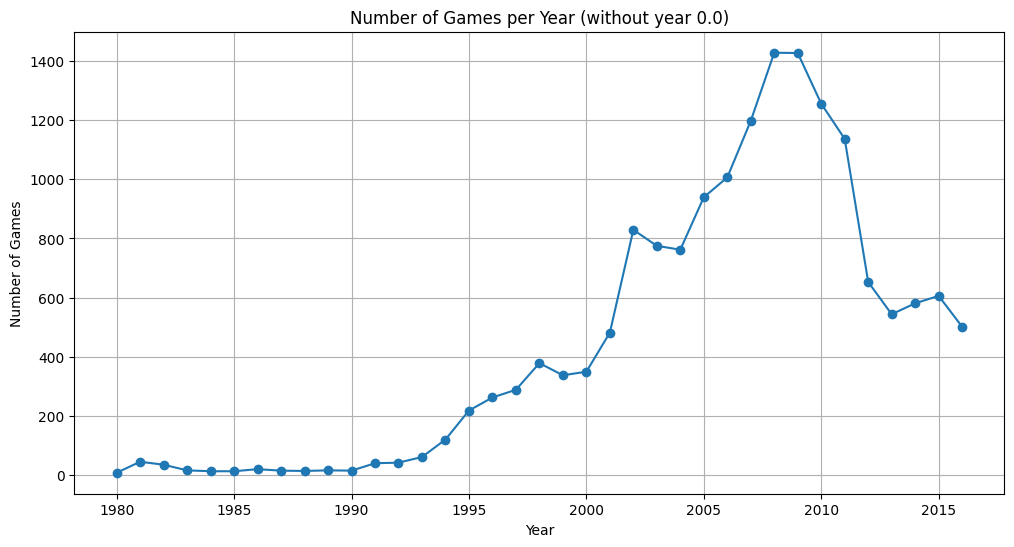

In [34]:
# Filter data to remove year 0.0
games_per_year_filtered = games_per_year[games_per_year.index != 0.0]

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(games_per_year_filtered.index, games_per_year_filtered.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.title('Number of Games per Year (without year 0.0)')
plt.grid(True)
plt.show()

<br>This means that in 1980, there were 9 games released, in 1981 there were 46 games, and so on until 2016 with 502 games released.

<br>The trend that can be observed is that the number of games released tends to increase from year to year, especially from 1990 to 2008. 2009 was the peak (peak) value of 1476. After that, there were fluctuations but it remained at a relatively high number until 2016.

<br>It is important to analyze these trends to gain a deeper understanding of the gaming industry, including possible factors influencing changes in the number of games released each year, such as technological developments, platform popularity, cultural trends, and more.

<a id='step3.2'></a>
### 3.2 Sales Variations for Each Platform

In [35]:
# Group by platform and calculate total sales
sales_per_platform = games.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

# Displays total sales per platform
sales_per_platform

,na_sales,eu_sales,jp_sales,other_sales
platform,,,,
2600,90.60,5.47,0.00,0.91
3do,0.00,0.00,0.10,0.00
3ds,83.49,61.48,100.67,13.36
dc,5.43,1.69,8.56,0.27
ds,382.40,188.89,175.57,59.26
gb,114.32,47.82,85.12,8.20
gba,187.54,75.25,47.33,7.73
gc,133.46,38.71,21.58,5.18
gen,21.05,6.05,2.70,0.97


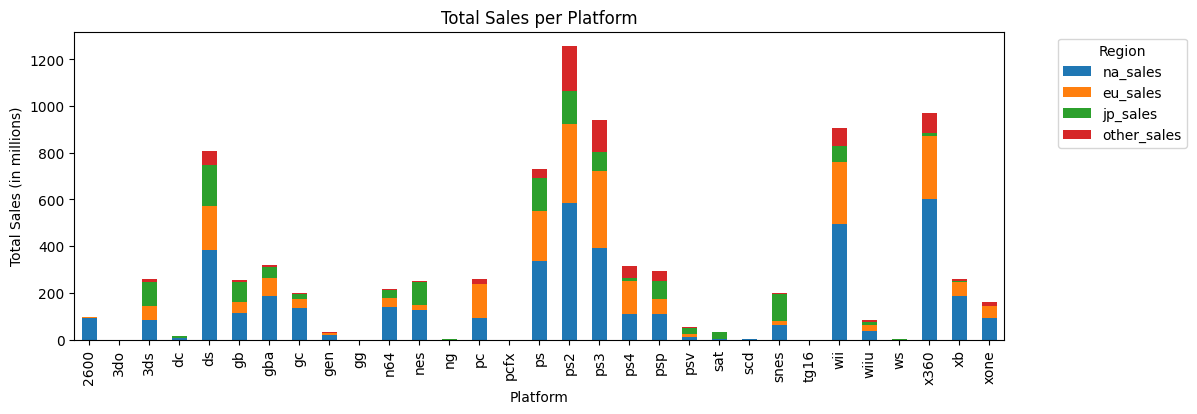

In [36]:
sales_per_platform.plot(kind='bar', stacked=True, figsize=(12, 4))
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.title('Total Sales per Platform')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<br>The following is a sales trend analysis of the top 10 platforms based on total sales:

1. PlayStation 2 (PS2):
- PS2 is the most successful game console of all time.
- High sales starting from around 2000 to early 2010.
- Sales decreased significantly after 2010 as they were replaced by new generation consoles.
2. Xbox 360 (X360):
- Sales of the X360 increased significantly after its launch in 2005.
- Peak sales occurred around 2008-2011.
- Sales started to decline after 2011 due to the emergence of new generation consoles and ended around 2016.
3. PlayStation 3 (PS3):
- PS3 was launched in 2006 and had sales steadily increase until it peaked around 2011-2012.
- Sales started to decline after 2012 due to the emergence of the new generation console (PS4).
4. PlayStation 4 (PS4):
- PS4 was launched in 2013 and immediately dominated the console market of that generation.
- Sales peaked around 2016-2017 and remain relatively high today.
5. Nintendo Wii:
- Wii was launched in 2006 and is a very popular gaming console.
- Peak sales occurred around 2006-2009.
- Sales started to decline after 2009 with the advent of the new generation of consoles.
6. PlayStation (PS1):
- PS1 was a very successful game console, especially in the 1990s.
- Sales began to decline after the arrival of the PS2 in 2000.
7. Nintendo DS (DS):
- DS is a popular handheld console with a variety of successful games.
- Sales were high from 2004 to the mid-2010s.
8. Game Boy Advance (GBA):
- GBA was a successful handheld console with many popular game titles.
- Sales were high from 2001 to the early 2010s.
9. PlayStation Portable (PSP):
- PSP was a successful handheld console with a variety of popular games.
- Sales were fairly stable from 2004 to the mid-2010s.
10. PlayStation (PS):
- PS was the first game console from Sony and was very successful in its time.
- Sales were high from the mid-1990s to the early 2000s before being replaced by the PS2.

<br>So, it takes 6 to 7 years for a new console to appear and 9 to 10 years for a platform to completely disappear from the world. market. Our relevant data will start from 2007 so we can have a timeline similar to the lifespan of the platform.
    
<br>This data provides an overview of the distribution of sales per platform in various regions. For example, some platforms have stronger sales in North America than in other regions, such as the Xbox 360 (X360), while some platforms have stronger sales in Japan, such as the Nintendo DS (DS) and PlayStation Portable (PSP).

<a id='step3.3'></a>
### 3.3 Platform with the largest total sales and distribution

<br>To analyze the platforms with the largest total sales and distribute them based on data per year, as well as look for platforms that were once popular but now have no sales, and determine how long it takes for new platforms to emerge and old platforms to fade from popularity, we will do following steps:

1. Choose the platform with the largest total sales.
2. Create a sales distribution based on annual data for the platform.
3. Look for platforms that used to be popular but now have no sales.
4. Calculate the average age of a platform from appearing to having no sales.

In [37]:
# Calculate total sales from columns 'na_sales', 'eu_sales', 'jp_sales', and 'other_sales'
sales_per_platform['total_sales'] = sales_per_platform['na_sales'] + sales_per_platform['eu_sales'] + sales_per_platform['jp_sales'] + sales_per_platform['other_sales']

# Take the platform with the largest total sales
largest_platform = sales_per_platform['total_sales'].idxmax()
print("The platform with the largest total sales is:", largest_platform)

The platform with the largest total sales is: ps2


In [38]:
# Filtering data for the PS2 platform
ps2_sales_per_year = games[games['platform'] == 'ps2'].groupby('year_of_release')['total_sales'].sum()

# Displays PS sales data every year
ps2_sales_per_year

year_of_release
0.0        22.21
2000.0     39.17
2001.0    166.43
2002.0    205.38
2003.0    184.31
2004.0    211.81
2005.0    160.66
2006.0    103.42
2007.0     75.99
2008.0     53.90
2009.0     26.40
2010.0      5.64
2011.0      0.45
Name: total_sales, dtype: float64

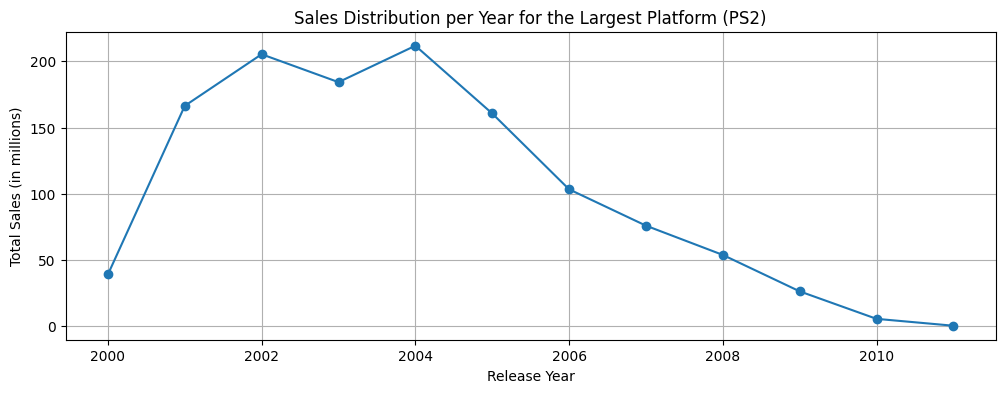

In [39]:
# Retrieves annual sales data for the largest platforms
sales_per_year = games[games['platform'] == largest_platform].groupby('year_of_release')['total_sales'].sum()

# Filter data to remove year 0.0
sales_per_year_filtered = sales_per_year[sales_per_year.index != 0.0]

# Create sales distribution per year
plt.figure(figsize=(12, 4))
plt.plot(sales_per_year_filtered.index, sales_per_year_filtered.values, marker='o')
plt.xlabel('Release Year')
plt.ylabel('Total Sales (in millions)')
plt.title('Sales Distribution per Year for the Largest Platform (PS2)')
plt.grid(True)
plt.show()

In [40]:
# Filter out platforms that have no current sales
platform_has_no_sales = sales_per_platform[sales_per_platform['total_sales'] == 0].index
print("Platforms that were popular but now have no sales:", platform_has_no_sales)

Platforms that were popular but now have no sales: Index([], dtype='object', name='platform')


In [41]:
# Taking the platform with the largest sales in the past
largest_platform_in_the_past = sales_per_platform['total_sales'].idxmax()

# Taking current sales of that platform
largest_platform_sales_in_the_past = sales_per_platform.loc[largest_platform_in_the_past, 'total_sales']

# Filters platforms that have had the greatest sales in the past but minimal current sales
current_low_sales_platform = sales_per_platform[sales_per_platform['total_sales'] < largest_platform_sales_in_the_past].index

print("Platforms that used to be popular but now have the fewest sales:")
print(current_low_sales_platform)

Platforms that used to be popular but now have the fewest sales:
Index(['2600', '3do', '3ds', 'dc', 'ds', 'gb', 'gba', 'gc', 'gen', 'gg', 'n64',
       'nes', 'ng', 'pc', 'pcfx', 'ps', 'ps3', 'ps4', 'psp', 'psv', 'sat',
       'scd', 'snes', 'tg16', 'wii', 'wiiu', 'ws', 'x360', 'xb', 'xone'],
      dtype='object', name='platform')


In [42]:
# Gets the release year for platforms that have had the largest sales in the past but current sales are minimal
year_release_platform_low_sales = games[(games['platform'].isin(current_low_sales_platform)) & (games['year_of_release'] > 0)]['year_of_release']


# Calculates the age of the platform until 2016
platform_age = 2016 - year_release_platform_low_sales.mean()

print("Average platform age from emergence to 2016:", platform_age, "years")

Average platform age from emergence to 2016: 9.233047000488796 years


<b>Conclusion</b>

1. Take the Platform with the Largest Total Sales:
- You search for the platform with the largest total sales by using idxmax() in the 'total_sales' column. The result was the 'ps2' platform.
    
2. Explanation of PlayStation 2 (PS2) sales trends based on annual sales data:
- 2000 - 2001:
PS2 sales increased significantly from 2000 to 2001, jumping more than fourfold, reaching 166.43 million units.
- 2001 - 2004:
The sales trend continued to increase until it reached its peak in 2004 with total sales reaching 211.81 million units.
- 2004 - 2006:
After reaching its peak, PS2 sales began to decline gradually over the next few years, but were still quite high.
- 2006 - 2011:
The decline in sales continued from 2006 to 2011. Sales fell significantly every year.
- Year 2011:
PS2 sales experienced a sharp decline to just 0.45 million units in 2011, indicating that the console had reached the end of its life cycle.
- Overall, the PS2 experienced a strong growth phase in the early 2000s, peaking around the middle of the decade. However, with the advent of next-generation consoles and changes in market trends, PS2 sales experienced a significant decline and ultimately bottomed out in 2011. This is in keeping with the general life cycle of gaming consoles where their popularity reaches a peak and then begins to fade as time goes by.
    
3. Look for Platforms That Used to Be Popular but Now Sell the Least:
- You are looking for a platform that has had the greatest sales in the past but current sales are minimal. The result is that all platforms have the same pattern, namely being popular then fading, with the caveat that there are still purchases, less than 0.
    
4. Calculating the Average Age of a Platform from Appearance to 2016:
- You calculate the average age of platforms from emergence to 2016 for platforms that were popular in the past but currently have the least sales. The result is approximately 9.23 years, which is the average age of the platform from the year of release to 2016.

<a id='step3.4'></a>
### 3.4 The platform has upsells

In [43]:
# Sort platforms based on total sales in descending order
platform_sales_top_10 = sales_per_platform.sort_values(by='total_sales', ascending=False).head(10)

# Displays the platforms with the top 10 sales
print("Platforms with the top 10 sales (1980-2016) :")
print(platform_sales_top_10.index)

Platforms with the top 10 sales (1980-2016) :
Index(['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps', 'gba', 'ps4', 'psp', 'pc'], dtype='object', name='platform')


In [44]:
# Filter data for 2000 and 2004
sales_2000 = games[games['year_of_release'] == 2000].groupby('platform')['total_sales'].sum()
sales_2004 = games[games['year_of_release'] == 2004].groupby('platform')['total_sales'].sum()

# Calculate sales growth from 2000 to 2004 in percent
growth_percent = ((sales_2004 - sales_2000) / sales_2000) * 100

# Platforms with upward sales growth
growth_positive_platforms = growth_percent[growth_percent > 0]

# Show platforms with upward sales growth (2000-2004) in percent
print("Platforms with increasing sales growth (2000-2004):")
print(growth_positive_platforms.sort_values(ascending=False).apply(lambda x: f'{x:.2f}%'))

Platforms with increasing sales growth (2000-2004):
platform
gba    111200.00%
xb       6508.08%
ps2       440.75%
pc        122.96%
Name: total_sales, dtype: object


In [45]:
# Filter data for 2004 and 2008
sales_2004 = games[games['year_of_release'] == 2004].groupby('platform')['total_sales'].sum()
sales_2008 = games[games['year_of_release'] == 2008].groupby('platform')['total_sales'].sum()

# Calculate sales growth from 2004 to 2008 in percent
growth_percent = ((sales_2008 - sales_2004) / sales_2004) * 100

# Platforms with upward sales growth
growth_positive_platforms = growth_percent[growth_percent > 0]

# Show platforms with upward sales growth (2004-2008) in percent
print("Platforms with increasing sales growth (2004-2008):")
print(growth_positive_platforms.sort_values(ascending=False).apply(lambda x: f'{x:.2f}%'))

Platforms with increasing sales growth (2004-2008):
platform
ds     741.40%
psp    389.38%
pc      19.54%
Name: total_sales, dtype: object


In [46]:
# Filter data for 2008 and 2012
sales_2008 = games[games['year_of_release'] == 2008].groupby('platform')['total_sales'].sum()
sales_2012 = games[games['year_of_release'] == 2012].groupby('platform')['total_sales'].sum()

# Calculate sales growth from 2008 to 2012 in percent
growth_percent = ((sales_2012 - sales_2008) / sales_2008) * 100

# Platforms with upward sales growth
growth_positive_platforms = growth_percent[growth_percent > 0]

# Show platforms with upward sales growth (2008-2012) in percent
print("Platforms with increasing sales growth (2008-2012):")
print(growth_positive_platforms.sort_values(ascending=False).apply(lambda x: f'{x:.2f}%'))

Platforms with increasing sales growth (2008-2012):
platform
pc    86.96%
Name: total_sales, dtype: object


In [47]:
# Filter data for 2012 and 2016
sales_2012 = games[games['year_of_release'] == 2012].groupby('platform')['total_sales'].sum()
sales_2016 = games[games['year_of_release'] == 2016].groupby('platform')['total_sales'].sum()

# Calculate sales growth from 2012 to 2016 in percent
growth_percent = ((sales_2016 - sales_2012) / sales_2012) * 100

# Platforms with upward sales growth
growth_positive_platforms = growth_percent[growth_percent > 0]

# Show platforms with upward sales growth (2012-2016) in percent
print("Platforms with increasing sales growth (2012-2016):")
print(growth_positive_platforms.sort_values(ascending=False).apply(lambda x: f'{x:.2f}%'))

Platforms with increasing sales growth (2012-2016):
Series([], Name: total_sales, dtype: float64)


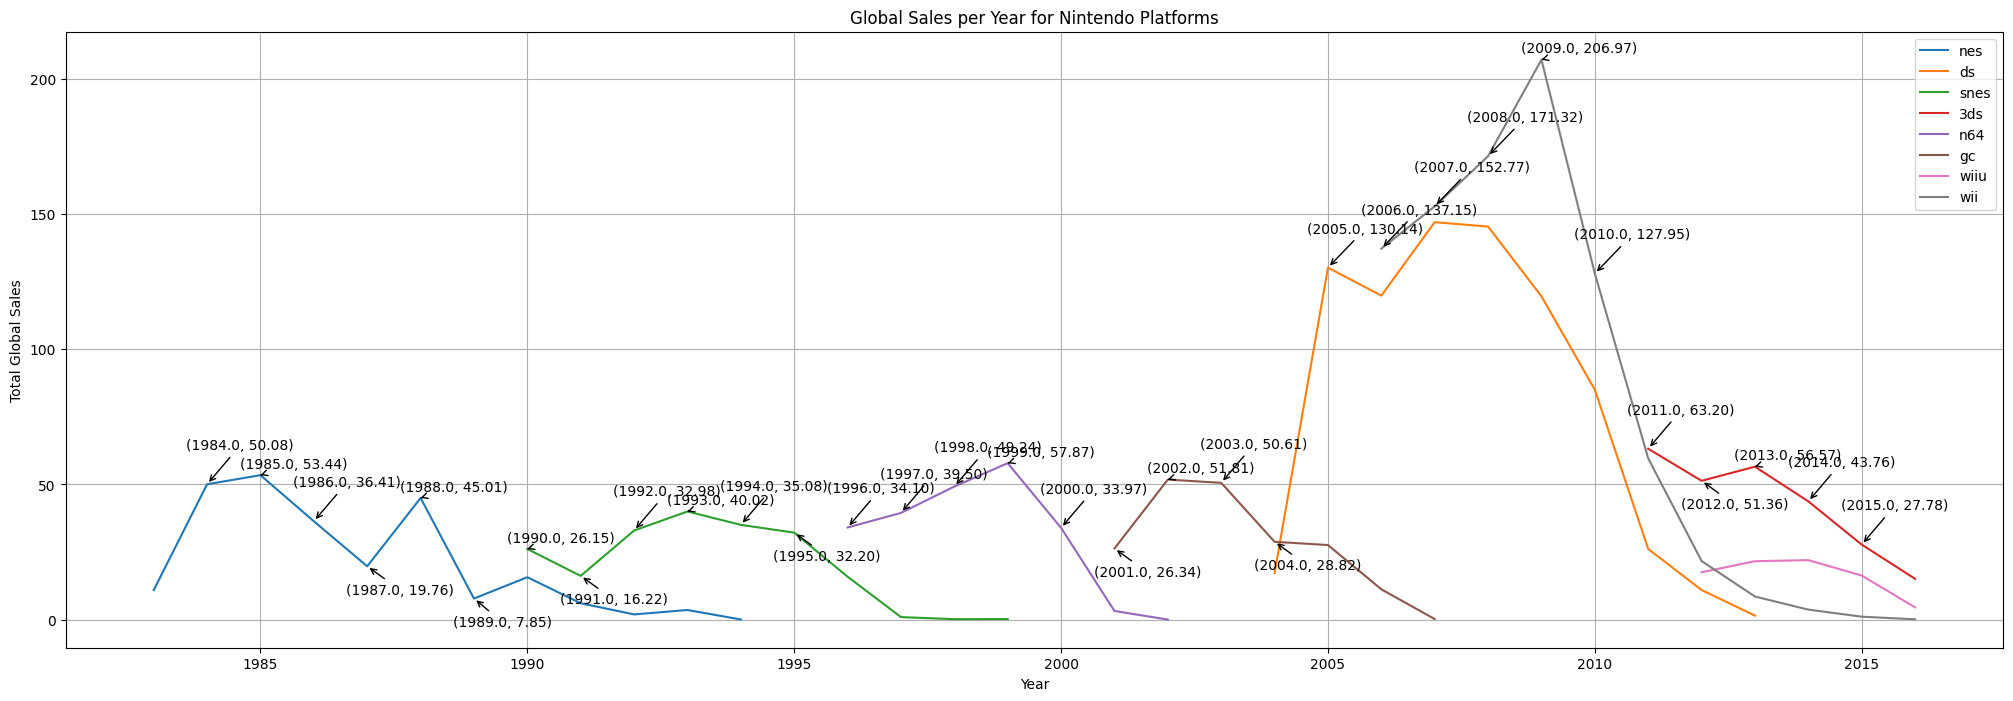

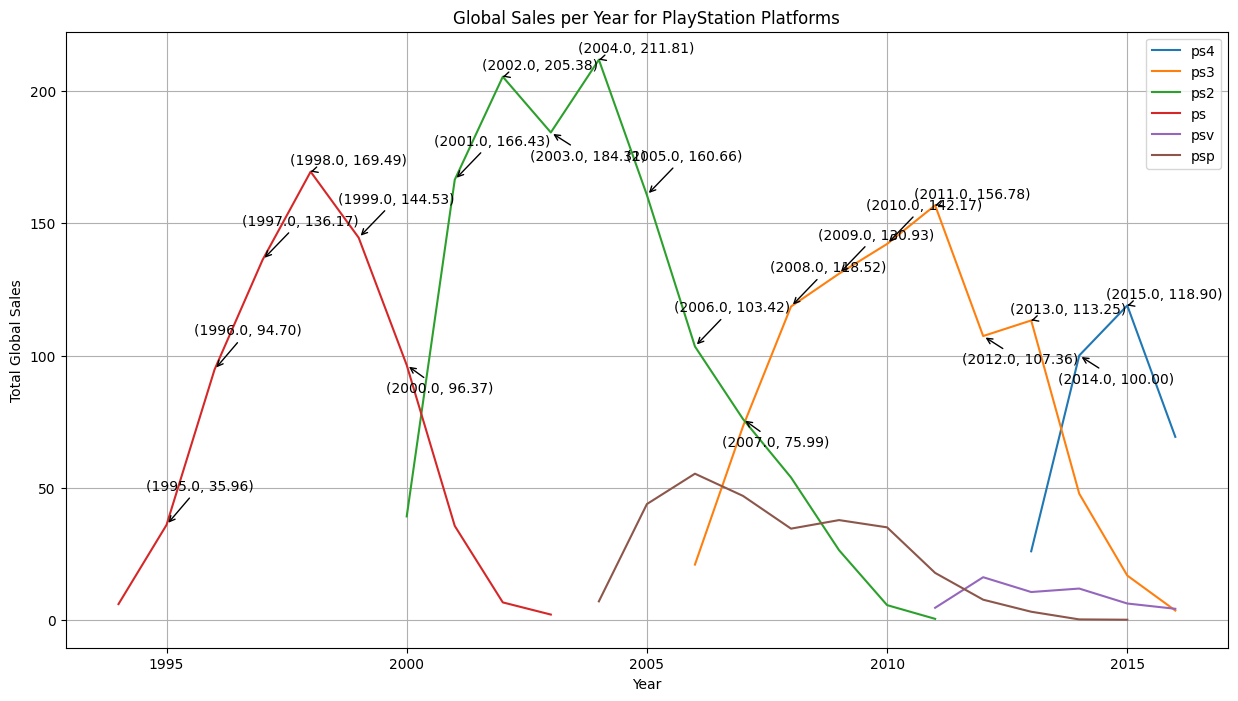

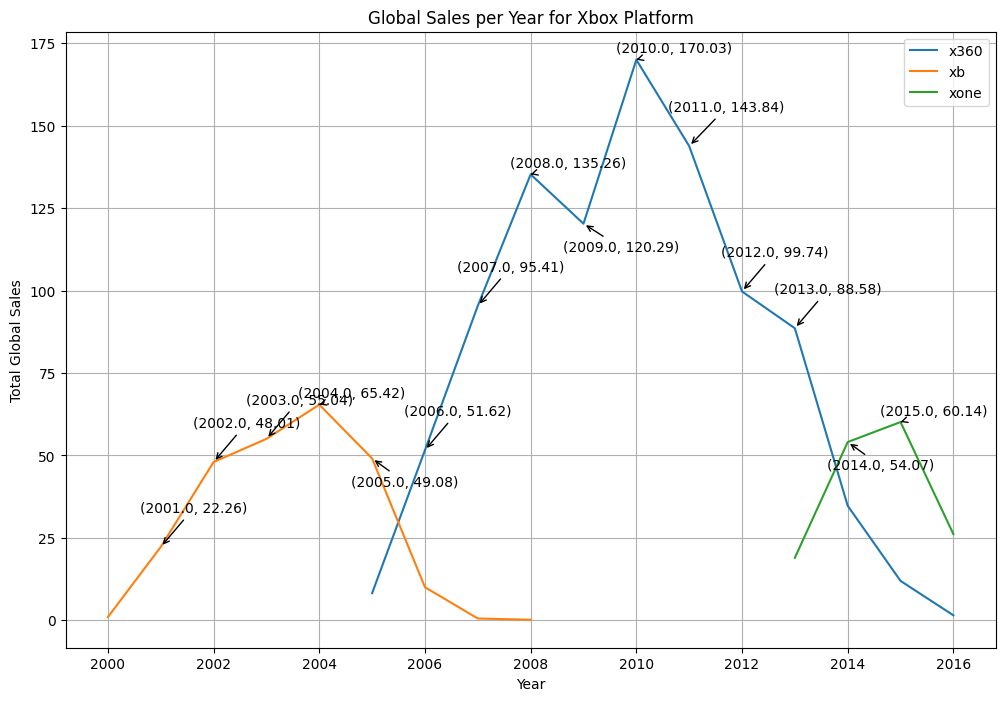

In [48]:
# Function to add annotations to important points
def annotate_points(x, y, ax):
    for i in range(1, len(x) - 1):
        # Determine if there are any significant changes
        significant_change = abs(y[i] - y[i - 1]) > 0.5 and abs(y[i] - y[i + 1]) > 0.5
        
        # Add annotations only if significant changes occur
        if significant_change:
            if y[i - 1] < y[i] > y[i + 1]:
                ax.annotate(f'({x[i]}, {y[i]:.2f})', xy=(x[i], y[i]), xytext=(-15, 5), 
                            textcoords='offset points', arrowprops=dict(arrowstyle="->"))
            elif y[i - 1] > y[i] < y[i + 1]:
                ax.annotate(f'({x[i]}, {y[i]:.2f})', xy=(x[i], y[i]), xytext=(-15, -20), 
                            textcoords='offset points', arrowprops=dict(arrowstyle="->"))
            elif y[i - 1] != y[i]:
                ax.annotate(f'({x[i]}, {y[i]:.2f})', xy=(x[i], y[i]), xytext=(-15, 25), 
                            textcoords='offset points', arrowprops=dict(arrowstyle="->"))

# Platform from which sales data will be taken
platforms_nintendo = ['nes', 'ds', 'snes', '3ds', 'n64', 'gc', 'wiiu', 'wii']

# Filter data based on selected platform
filtered_data_nintendo = games[(games['platform'].isin(platforms_nintendo)) & (games['year_of_release'] > 0)]

# Group data by year and platform, then sum total sales
sales_per_year_per_platform_nintendo = filtered_data_nintendo.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Line plot of global sales by year for Nintendo platforms
plt.figure(figsize=(25, 8))
for platform in platforms_nintendo:
    plt.plot(sales_per_year_per_platform_nintendo.index, sales_per_year_per_platform_nintendo[platform], label=platform)

plt.xlabel('Year')
plt.ylabel('Total Global Sales')
plt.title('Global Sales per Year for Nintendo Platforms')
plt.legend()
plt.grid(True)

# Call the function to add text at the peak point, low point, and change point
annotate_points(sales_per_year_per_platform_nintendo.index, 
                sales_per_year_per_platform_nintendo.max(axis=1).values, 
                plt.gca())

plt.show()

# Platform from which sales data will be taken
platforms_playstation = ['ps4', 'ps3', 'ps2', 'ps', 'psv', 'psp']

# Filter data based on selected platform
filtered_data_playstation = games[(games['platform'].isin(platforms_playstation)) & (games['year_of_release'] > 0)]

# Group data by year and platform, then sum total sales
sales_per_year_per_platform_playstation = filtered_data_playstation.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Line plot of global sales by year for the PlayStation platform
plt.figure(figsize=(15, 8))
for platform in platforms_playstation:
    plt.plot(sales_per_year_per_platform_playstation.index, sales_per_year_per_platform_playstation[platform], label=platform)

plt.xlabel('Year')
plt.ylabel('Total Global Sales')
plt.title('Global Sales per Year for PlayStation Platforms')
plt.legend()
plt.grid(True)

# Call the function to add text at the peak point, low point, and change point
annotate_points(sales_per_year_per_platform_playstation.index, 
                sales_per_year_per_platform_playstation.max(axis=1).values, 
                plt.gca())

plt.show()

# Platform from which sales data will be taken
platforms_xbox = ['x360', 'xb', 'xone']

# Filter data based on selected platform
filtered_data_xbox = games[(games['platform'].isin(platforms_xbox)) & (games['year_of_release'] > 0)]

# Group data by year and platform, then sum total sales
sales_per_year_per_platform_xbox = filtered_data_xbox.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Line plot of global sales by year for the Xbox platform
plt.figure(figsize=(12, 8))
for platform in platforms_xbox:
    plt.plot(sales_per_year_per_platform_xbox.index, sales_per_year_per_platform_xbox[platform], label=platform)

plt.xlabel('Year')
plt.ylabel('Total Global Sales')
plt.title('Global Sales per Year for Xbox Platform')
plt.legend()
plt.grid(True)

# Call the function to add text at the peak point, low point, and change point
annotate_points(sales_per_year_per_platform_xbox.index, 
                sales_per_year_per_platform_xbox.max(axis=1).values, 
                plt.gca())

plt.show()



<br>The shrinking platforms are ps3, x360, wiiu, pc, 3ds, and psv. The platforms that are developing are PS4 and Xone. their bins were not as large as in 2016 perhaps because 2016 had not yet ended when the data was obtained. However they are still in the early stages of their lifespan so we can expect them to generate more profits for at least the next 2 or 3 years. The other platforms were dead before 2016.

<a id='step3.5'></a>
### 3.5 Several platforms that have the potential to generate profits

In [49]:
# Takes data for 2012 and 2016, ignoring the release year which has a value of 0
sales_2012 = games[(games['year_of_release'] == 2012) & (games['year_of_release'] > 0)].groupby('platform')['total_sales'].sum()
sales_2016 = games[(games['year_of_release'] == 2016) & (games['year_of_release'] > 0)].groupby('platform')['total_sales'].sum()

# Takes total sales during the 2012-2016 period
total_sales_2012_2016 = sales_2012.add(sales_2016, fill_value=0)

# Taking the 10 platforms with the most sales during the 2012-2016 period
top_10_platforms_2012_2016 = total_sales_2012_2016.sort_values(ascending=False).head(10)

# Calculates the first and last release year for each platform
first_release_year = games[games['year_of_release'] > 0].groupby('platform')['year_of_release'].min()
last_release_year = games[games['year_of_release'] > 0].groupby('platform')['year_of_release'].max()

# Calculate the age (lifespan) of each platform
lifespan_per_platform = last_release_year - first_release_year

# Take lifespan only for top 10 platforms
lifespan_top_10_platforms = lifespan_per_platform[top_10_platforms_2012_2016.index]

# Combines sales and lifespan information (lifespan) of the top 10 platforms
platform_sales_lifespan_df_10 = pd.DataFrame({
     'Sales (Million USD) 2012-2016': top_10_platforms_2012_2016,
     'Age (Lifespan)': lifespan_top_10_platforms
})

# Initialize the eligibility column with the value 'Loss'
platform_sales_lifespan_df_10['Eligibility'] = 'Loss'

# Change the eligibility value according to the criteria
platform_sales_lifespan_df_10.loc[(lifespan_top_10_platforms < 9) | (lifespan_top_10_platforms > 30), 'Eligibility'] = 'Profitable'

# Displays a dataframe with information on sales, age (lifespan), and viability of the top 10 platforms
print("Sales Information, Age (Lifespan), and Eligibility of Top 10 Platforms (2012-2016):")
print(platform_sales_lifespan_df_10.sort_values(by='Sales (Million USD) 2012-2016', ascending=False))


Sales Information, Age (Lifespan), and Eligibility of Top 10 Platforms (2012-2016):
          Sales (Million USD) 2012-2016  Age (Lifespan) Eligibility
platform                                                           
ps3                              110.96            10.0        Loss
x360                             101.26            11.0        Loss
ps4                               69.25             3.0  Profitable
3ds                               66.50             5.0  Profitable
pc                                28.47            31.0  Profitable
xone                              26.15             3.0  Profitable
wiiu                              22.16             4.0  Profitable
wii                               21.89            10.0        Loss
psv                               20.44             5.0  Profitable
ds                                11.01            28.0        Loss


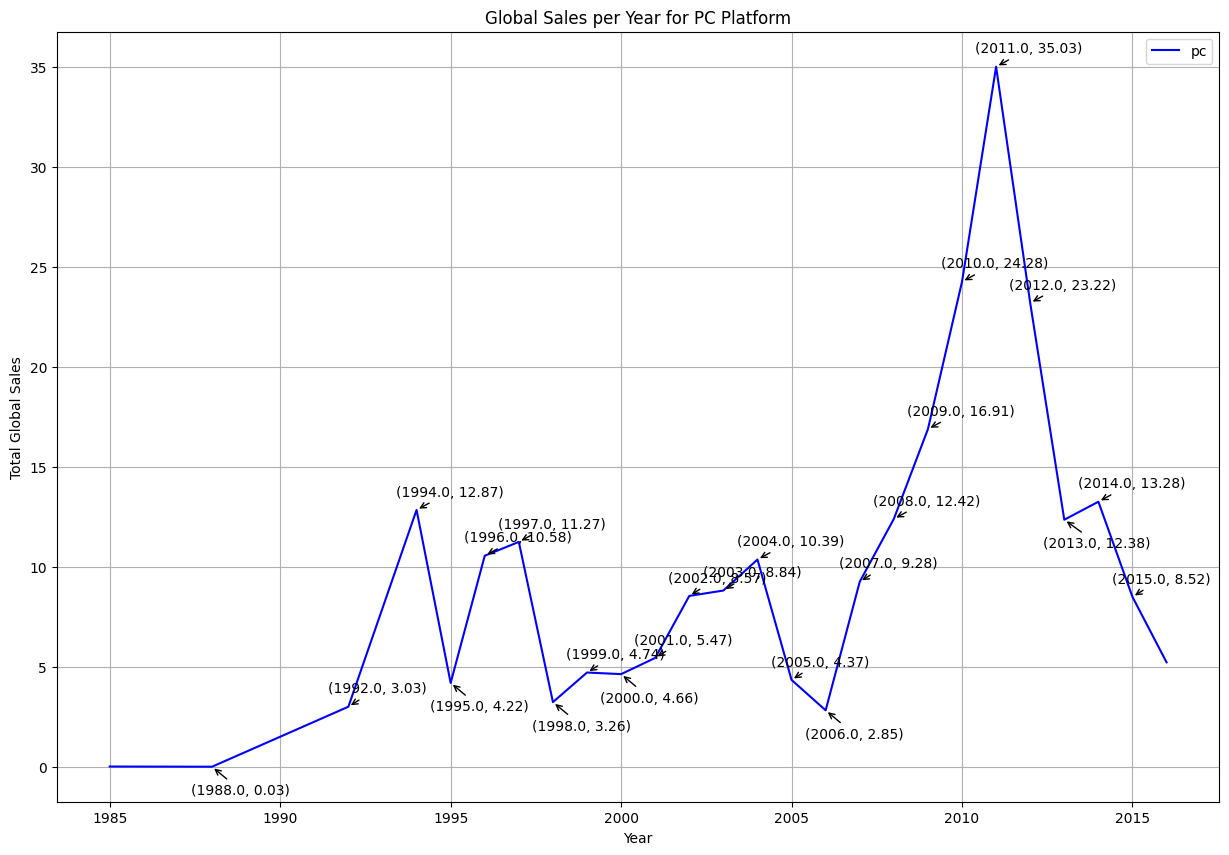

In [50]:
# Displays the x and y values at the peak point, lowest point, as well as the increase and decrease change points
def annotate_points(x, y, ax):
     for i in range(1, len(x) - 1):
         if y[i - 1] < y[i] > y[i + 1]:
             ax.annotate(f'({x[i]}, {y[i]:.2f})', xy=(x[i], y[i]), xytext=(-15, 10),
                         textcoords='offset points', arrowprops=dict(arrowstyle="->"))
         elif y[i - 1] > y[i] < y[i + 1]:
             ax.annotate(f'({x[i]}, {y[i]:.2f})', xy=(x[i], y[i]), xytext=(-15, -20),
                         textcoords='offset points', arrowprops=dict(arrowstyle="->"))
         elif y[i - 1] != y[i]:
             ax.annotate(f'({x[i]}, {y[i]:.2f})', xy=(x[i], y[i]), xytext=(-15, 10),
                         textcoords='offset points', arrowprops=dict(arrowstyle="->"))

# Platform from which sales data will be taken
platform = 'pc'

# Filter data based on selected platform
filtered_data = games[(games['platform'] == platform) & (games['year_of_release'] > 0)]

# Group data by year and platform, then sum total sales
sales_per_year = filtered_data.groupby('year_of_release')['total_sales'].sum()
            
# Plot global sales line per year for the selected platform
plt.figure(figsize=(15, 10))
plt.plot(sales_per_year.index, sales_per_year.values, label=platform, color='b')

plt.xlabel('Year')
plt.ylabel('Total Global Sales')
plt.title('Global Sales per Year for PC Platform')
plt.legend()
plt.grid(True)

# Call the function to add text at the peak point, low point, and change point
annotate_points(sales_per_year.index, sales_per_year.values, plt.gca())

plt.show()

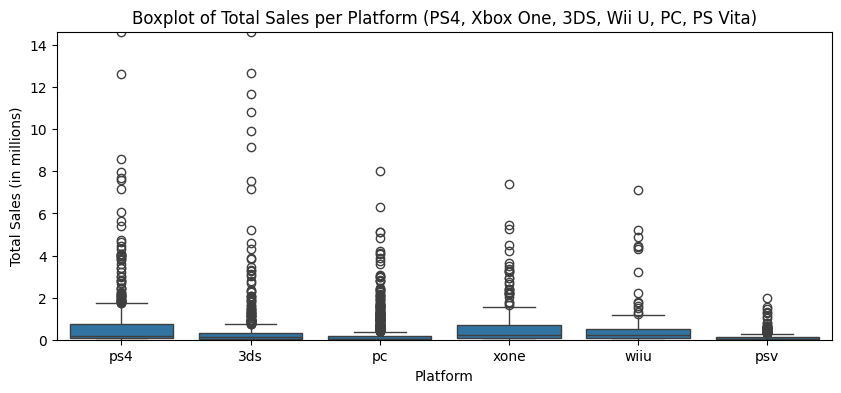

In [51]:
# Filter data for the desired platform
selected_platforms = ['ps4', 'xone', '3ds', 'wiiu', 'pc', 'psv']
selected_data = games[games['platform'].isin(selected_platforms)]

# Create a boxplot for total sales per platform with the lower bound of y at 0
plt.figure(figsize=(10, 4))
sns.boxplot(x='platform', y='total_sales', data=selected_data)
plt.ylim(0, selected_data['total_sales'].max()) # Set y lower limit to 0
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.title('Boxplot of Total Sales per Platform (PS4, Xbox One, 3DS, Wii U, PC, PS Vita)')
plt.show()

<b>Explanation</b>

1. Some platforms that have the potential to generate profits are 'ps4', 'xone', '3ds', 'wiiu', 'psv', because they have a lifespan of 9.25 years and were produced between 2010-2012 so they still have time to market until 2019-2020

2. 'PC' had sales from 1985 to 2016, because by buying a 'PC' buyers could play various games provided by other platforms and with 'PC' buyers could create their own games. So 'PC' has a very long lifespan of more than 31 years and will continue to grow

<a id='step3.6'></a>
### 3.6 Global Sales

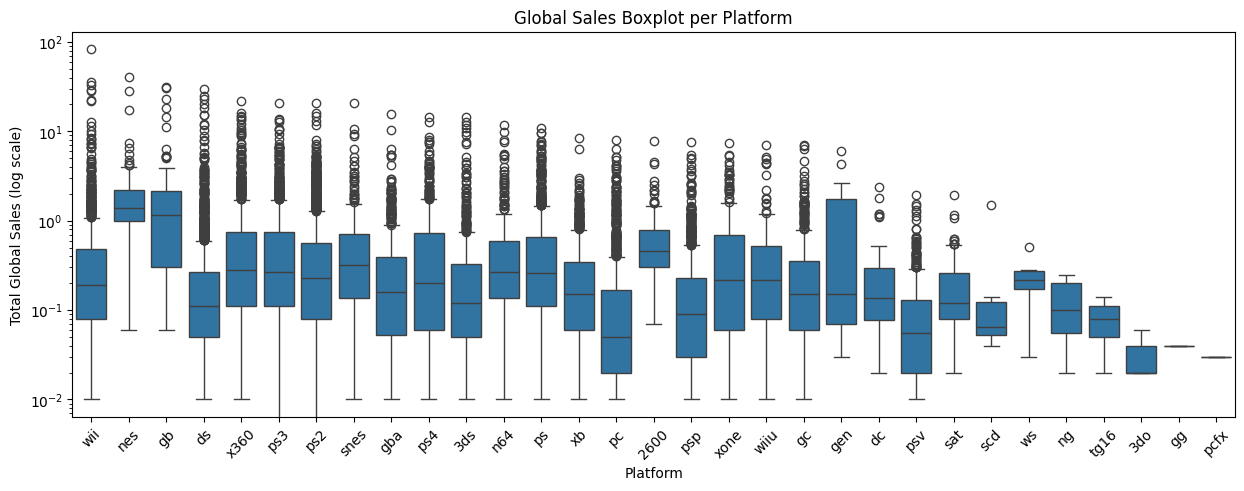

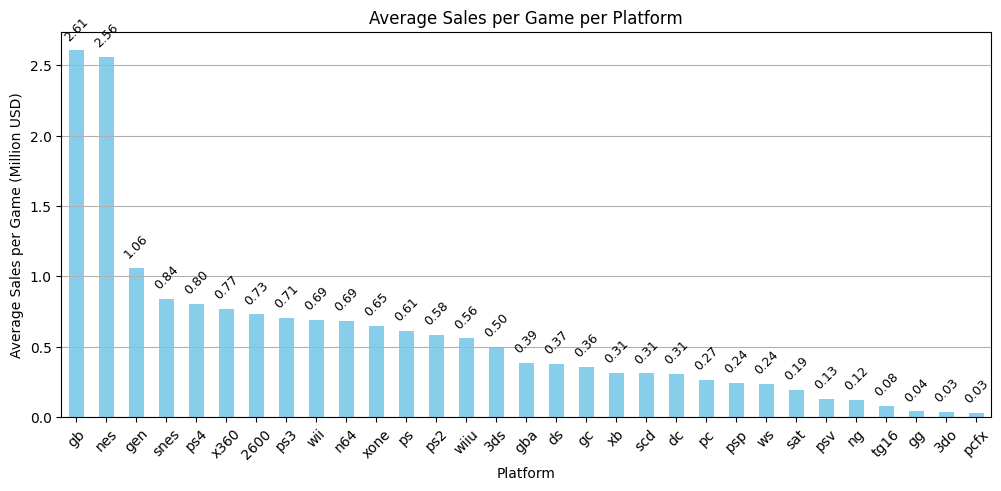

In [52]:
# Create a boxplot for global sales per platform
plt.figure(figsize=(15, 5))
sns.boxplot(x='platform', y='total_sales', data=games)
plt.yscale('log') # Uses a logarithmic scale for the y-axis
plt.xlabel('Platform')
plt.ylabel('Total Global Sales (log scale)')
plt.title('Global Sales Boxplot per Platform')
plt.xticks(rotation=45)
plt.show()

# Group data by platform, then calculate average sales per game
average_sales_per_platform = games.groupby('platform')['total_sales'].mean().sort_values(ascending=False)

# Plot bar chart of average sales per platform
plt.figure(figsize=(12, 5))
ax = average_sales_per_platform.plot(kind='bar', color='skyblue')
plt.xlabel('Platform')
plt.ylabel('Average Sales per Game (Million USD)')
plt.title('Average Sales per Game per Platform')

# Add an average value label above each bar
for i, v in enumerate(average_sales_per_platform):
     ax.text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom', fontsize=9, rotation=45)

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [53]:
# Deletes data with 'year_of_release' value 0
filtered_games = games[games['year_of_release'] > 0]

# Group data by platform, then calculate average sales per game
average_sales_per_platform = filtered_games.groupby('platform')['total_sales'].mean().sort_values(ascending=False)

# Display a DataFrame with a column of average sales per game
average_sales_per_platform_df = pd.DataFrame(average_sales_per_platform, columns=['Average Sales per Game (Million USD)'])

In [54]:
# Calculates the first and last release year for each platform
first_release_year = filtered_games.groupby('platform')['year_of_release'].min()
last_release_year = filtered_games.groupby('platform')['year_of_release'].max()

# Calculate the age (lifespan) of each platform
lifespan_per_platform = last_release_year - first_release_year

In [55]:
# Combines information on average sales per game and lifespan (lifespan) for each platform
platform_summary_df = pd.DataFrame({
     'Average Sales per Game (Million USD)': average_sales_per_platform,
     'Lifespan (Lifespan)': lifespan_per_platform
})

# Displays a dataframe with aggregated information
print("Aggregated Information per Platform:")
print(platform_summary_df.sort_values(by='Average Sales per Game (Million USD)', ascending=False))

Aggregated Information per Platform:
          Average Sales per Game (Million USD)  Lifespan (Lifespan)
platform                                                           
gb                                    2.622990                 13.0
nes                                   2.561735                 11.0
gen                                   1.061034                  4.0
snes                                  0.836987                  9.0
ps4                                   0.801378                  3.0
x360                                  0.780227                 11.0
2600                                  0.745517                  9.0
ps3                                   0.713124                 10.0
wii                                   0.692986                 10.0
n64                                   0.689905                  6.0
xone                                  0.645020                  3.0
ps                                    0.611412                  9.0
ps2        

<br>Based on data on average sales per game (in million USD) and lifespan (lifespan) of each platform, we can make several conclusions:

1. Average Sales per Game:
- The platform with the highest average sales per game is Game Boy (gb) with average sales of around 2.61 million USD per game, followed by NES (nes) and Sega Genesis (gen).
- The platforms with the lowest average sales per game are PC-FX (pcfx), 3DO (3do), and GG (gg) with average sales below 0.05 million USD per game.
2. Platform Lifespan:
- The platform with the longest life span is PC (PC) with a lifespan of around 31 years, followed by Nintendo DS (DS) and Game Boy (GB).
- Some platforms such as TurboGrafx-16 (tg16), PC-FX (pcfx), and GG (gg) have a very short lifespan with a lifespan of 0 years, meaning these platforms have no games released after the first year of release.

    
<br>From the conclusion above, we can see that although certain platforms have high average sales per game, the lifespan (lifespan) of the platform is also an important factor in assessing the potential and long-term success of the platform. Some platforms with lower sales averages may have a longer lifespan, indicating that they may have good stability and staying power in the gaming industry. On the other hand, platforms with a very short lifespan may have difficulty surviving in the market.

<a id='step3.7'></a>
### 3.7 The influence of user and professional reviews on sales

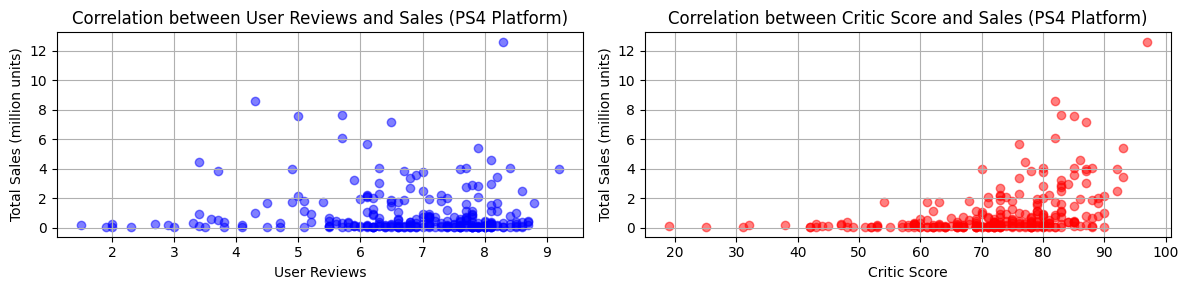

Correlation between User Reviews and PS4 Sales: -0.031957110204556466
Correlation between Critic Score and PS4 Sales: 0.4065679020617815


In [56]:
# Replace 'tbd' with NaN in all 'user_score' columns in the main dataset
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

# Retrieves data for the PS4 platform
ps4_data = games[games['platform'] == 'ps4']

# Retrieves user review, critic score and sales columns
user_scores = ps4_data['user_score']
critic_scores = ps4_data['critic_score']
total_sales = ps4_data['total_sales']

# Continue with visualization after cleaning data
fig, ax = plt.subplots(1, 2, figsize=(12, 3))

# Scatter plot of user reviews vs. sales for PS4
ax[0].scatter(user_scores, total_sales, alpha=0.5, color='b')
ax[0].set_xlabel('User Reviews')
ax[0].set_ylabel('Total Sales (million units)')
ax[0].set_title('Correlation between User Reviews and Sales (PS4 Platform)')
ax[0].grid(True)

# Scatter plot of critic scores vs. critics sales for PS4
ax[1].scatter(critic_scores, total_sales, alpha=0.5, color='r')
ax[1].set_xlabel('Critic Score')
ax[1].set_ylabel('Total Sales (million units)')
ax[1].set_title('Correlation between Critic Score and Sales (PS4 Platform)')
ax[1].grid(True)

plt.tight_layout()
plt.show()

# Calculates the correlation between user reviews, critic scores and sales
user_sales_corr = user_scores.corr(total_sales)
critic_sales_corr = critic_scores.corr(total_sales)

print('Correlation between User Reviews and PS4 Sales:', user_sales_corr)
print('Correlation between Critic Score and PS4 Sales:', critic_sales_corr)

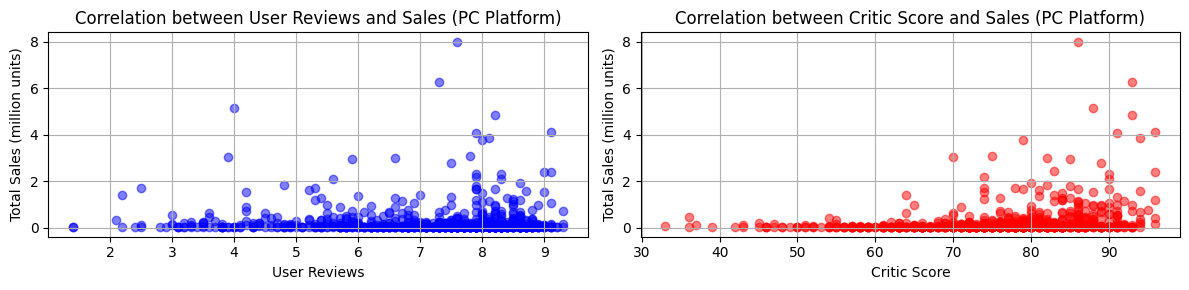

Correlation between User Reviews and PC Sales: 0.010475684621486432
Correlation between Critic Score and PC Sales: 0.2568867378948212


In [57]:
# Fetch data for PC platform
pc_data = games[games['platform'] == 'pc']

# Retrieves user reviews, critic scores and sales columns for PC
pc_user_scores = pc_data['user_score']
pc_critic_scores = pc_data['critic_score']
pc_total_sales = pc_data['total_sales']

# Scatter plot of user reviews vs. sales and critic scores vs. sales for PC
fig, ax = plt.subplots(1, 2, figsize=(12, 3))

# Scatter plot of user reviews vs. sales for PC
ax[0].scatter(pc_user_scores, pc_total_sales, alpha=0.5, color='b')
ax[0].set_xlabel('User Reviews')
ax[0].set_ylabel('Total Sales (million units)')
ax[0].set_title('Correlation between User Reviews and Sales (PC Platform)')
ax[0].grid(True)

# Scatter plot of critic scores vs. critics sales for PC
ax[1].scatter(pc_critic_scores, pc_total_sales, alpha=0.5, color='r')
ax[1].set_xlabel('Critic Score')
ax[1].set_ylabel('Total Sales (million units)')
ax[1].set_title('Correlation between Critic Score and Sales (PC Platform)')
ax[1].grid(True)

plt.tight_layout()
plt.show()


# Calculates the correlation between user reviews, critic scores and sales for PC
pc_user_sales_corr = pc_user_scores.corr(pc_total_sales)
pc_critic_sales_corr = pc_critic_scores.corr(pc_total_sales)

print('Correlation between User Reviews and PC Sales:', pc_user_sales_corr)
print('Correlation between Critic Score and PC Sales:', pc_critic_sales_corr)

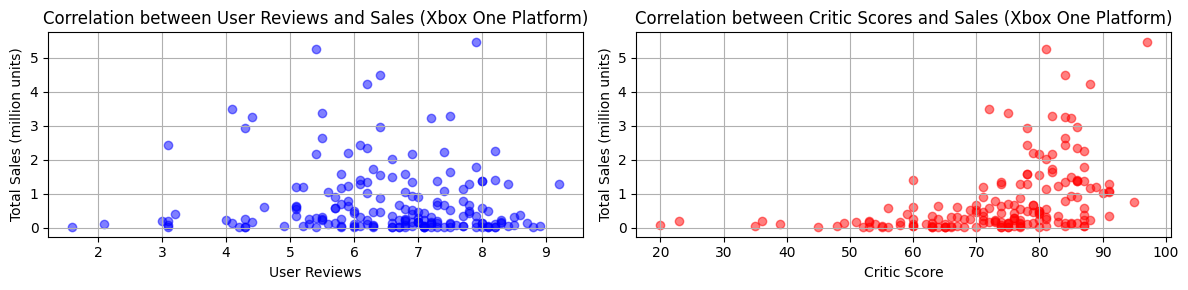

Correlation between User Reviews and Xbox One (XOne) Sales: -0.06892505328279419
Correlation between Critic Score and Xbox One (XOne) Sales: 0.4169983280084016


In [58]:
# Retrieve data for the Xbox One (XOne) platform
xone_data = games[games['platform'] == 'xone']

# Retrieves user reviews, critic scores, and sales columns for Xbox One (XOne)
xone_user_scores = xone_data['user_score']
xone_critic_scores = xone_data['critic_score']
xone_total_sales = xone_data['total_sales']

# Scatter plot of user reviews vs. sales and critic scores vs. sales for Xbox One (XOne)
fig, ax = plt.subplots(1, 2, figsize=(12, 3))

# Scatter plot of user reviews vs. sale
ax[0].scatter(xone_user_scores, xone_total_sales, alpha=0.5, color='b')
ax[0].set_xlabel('User Reviews')
ax[0].set_ylabel('Total Sales (million units)')
ax[0].set_title('Correlation between User Reviews and Sales (Xbox One Platform)')
ax[0].grid(True)

# Scatter plot of critic scores vs. critics sale
ax[1].scatter(xone_critic_scores, xone_total_sales, alpha=0.5, color='r')
ax[1].set_xlabel('Critic Score')
ax[1].set_ylabel('Total Sales (million units)')
ax[1].set_title('Correlation between Critic Scores and Sales (Xbox One Platform)')
ax[1].grid(True)

plt.tight_layout()
plt.show()

# Calculates the correlation between user reviews, critic scores and sales for Xbox One (XOne)
xone_user_sales_corr = xone_user_scores.corr(xone_total_sales)
xone_critic_sales_corr = xone_critic_scores.corr(xone_total_sales)

print('Correlation between User Reviews and Xbox One (XOne) Sales:', xone_user_sales_corr)
print('Correlation between Critic Score and Xbox One (XOne) Sales:', xone_critic_sales_corr)

<br>You have performed a correlation analysis between user reviews, critic scores, and sales for the PS4, PC, and Xbox One (XOne) platforms. The following is a summary of the correlation results:

1. PS4:
- Correlation between User Reviews and PS4 Sales: -0.031957110204556424
- Correlation between Critic Score and PS4 Sales: 0.40656790206178095
2. PC:
- Correlation between User Reviews and PC Sales: 0.010475684621486417
- Correlation between Critic Score and PC Sales: 0.2568867378948215
3. Xbox One (XOne):
- Correlation between User Reviews and Xbox One (XOne) Sales: -0.06892505328279414
- Correlation between Critic Score and Xbox One (XOne) Sales: 0.4169983280084017

    
<br>It can be seen that the correlation between user reviews, critic scores, and sales varies for each platform. On PS4 and Xbox One (XOne), critic scores have a more significant correlation with sales than user reviews. Meanwhile, on PC, the correlation between user reviews and sales is lower.

<a id='step3.8'></a>
### 3.8 Compare Sales of the Same Game on Other Platforms

In [59]:
# Combines all game names into one string
all_names = ' '.join(games['name'].str.lower().fillna('').values)

# Breaks strings into words
words = all_names.split()

# Counts the frequency of each word
word_frequencies = Counter(words)

# Takes the 100 most common words
top_words = word_frequencies.most_common(100)

# Displays results
for word, frequency in top_words:
     print(f'{word}: {frequency}')

:: 6608
the: 2756
of: 1731
2: 1187
's: 981
!: 885
no: 753
3: 546
world: 414
&: 359
pro: 321
game: 313
ii: 296
super: 291
to: 291
(: 279
): 279
and: 263
-: 250
star: 244
soccer: 233
dragon: 228
wars: 218
4: 211
in: 200
battle: 196
nba: 194
for: 191
.: 190
nfl: 175
disney: 165
lego: 164
heroes: 161
collection: 160
party: 157
a: 151
dance: 151
ultimate: 151
sales: 151
edition: 150
racing: 148
warriors: 147
fifa: 143
adventure: 137
,: 133
war: 131
vs.: 127
king: 126
iii: 125
tour: 125
portable: 125
final: 124
championship: 123
baseball: 120
dead: 118
gundam: 118
legend: 117
series: 117
force: 116
mario: 115
ninja: 111
evolution: 110
nhl: 110
5: 109
street: 109
quest: 109
challenge: 109
adventures: 108
fantasy: 108
dark: 106
monster: 105
hero: 104
league: 103
ball: 101
pack: 100
madden: 98
jp: 98
x: 97
football: 97
legends: 96
speed: 95
sports: 94
games: 94
man: 94
tom: 93
/: 93
power: 93
rock: 92
evil: 90
revolution: 90
de: 89
time: 88
yakyuu: 88
?: 87
metal: 86
clancy: 85
1: 84
need: 83
m

In [60]:
# Clean data from missing values (NaN) in the 'name' column
cleaned_games = games.dropna(subset=['name'])

# Filter data for games with names containing 'mario'
mario_games = cleaned_games[cleaned_games['name'].str.contains('mario', case=False)]

# Retrieve a list of platforms for games that have names containing 'mario'
mario_platforms = mario_games['platform'].unique()

print("Platforms that have games with names containing 'mario':")
print(mario_platforms)

Platforms that have games with names containing 'mario':
['nes' 'wii' 'ds' 'snes' 'gb' '3ds' 'n64' 'wiiu' 'gc' 'gba' '2600']


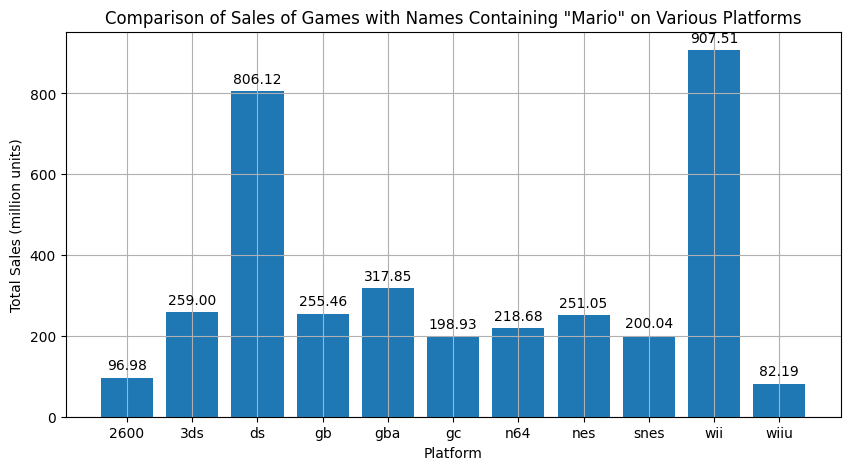

In [61]:
# Platforms that have games with names containing 'mario'
mario_platforms = ['nes', 'wii', 'ds', 'snes', 'gb', '3ds', 'n64', 'wiiu', 'gc', 'gba', '2600']

# Filter data for games with names containing 'mario'
mario_games = games[games['platform'].isin(mario_platforms)]

# Retrieve sales information for each platform
sales_by_platform = mario_games.groupby('platform')['total_sales'].sum()

# Create sales comparison charts
plt.figure(figsize=(10, 5))
plt.bar(sales_by_platform.index, sales_by_platform.values)
plt.xlabel('Platform')
plt.ylabel('Total Sales (million units)')
plt.title('Comparison of Sales of Games with Names Containing "Mario" on Various Platforms')

# Add a value label above each bar
for i in range(len(sales_by_platform)):
     plt.text(i, sales_by_platform.values[i] + 20, f'{sales_by_platform.values[i]:,.2f}', ha='center')

plt.grid(True)
plt.show()

In [62]:
sales_by_platform

platform
2600     96.98
3ds     259.00
ds      806.12
gb      255.46
gba     317.85
gc      198.93
n64     218.68
nes     251.05
snes    200.04
wii     907.51
wiiu     82.19
Name: total_sales, dtype: float64

In [63]:
# Filter data for games with names containing 'fifa'
fifa_games = cleaned_games[cleaned_games['name'].str.contains('fifa', case=False)]

# Retrieve a list of platforms for games that have names containing 'fifa'
fifa_platforms = fifa_games['platform'].unique()

print("Platforms that have games with names containing 'fifa':")
print(fifa_platforms)

Platforms that have games with names containing 'fifa':
['ps4' 'ps3' 'x360' 'ps2' 'xone' 'ps' 'psp' 'wii' 'xb' 'ds' 'psv' 'n64'
 'wiiu' 'pc' '3ds' 'gc' 'gba']


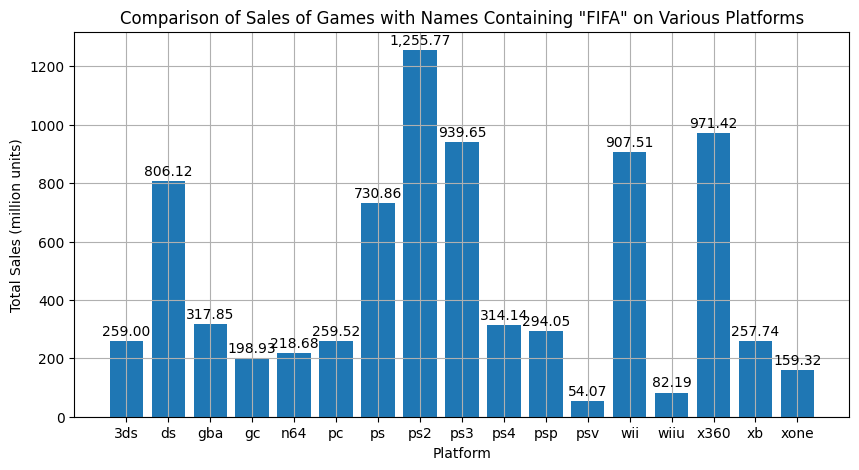

In [64]:
# Filter data for games with names containing 'fifa'
fifa_games = games[games['platform'].isin(fifa_platforms)]

# Retrieve sales information for each platform
fifa_sales_by_platform = fifa_games.groupby('platform')['total_sales'].sum()

# Create a sales comparison chart for 'fifa'
plt.figure(figsize=(10, 5))
plt.bar(fifa_sales_by_platform.index, fifa_sales_by_platform.values)
plt.xlabel('Platform')
plt.ylabel('Total Sales (million units)')
plt.title('Comparison of Sales of Games with Names Containing "FIFA" on Various Platforms')

# Add a value label above each bar
for i in range(len(fifa_sales_by_platform)):
     plt.text(i, fifa_sales_by_platform.values[i] + 20, f'{fifa_sales_by_platform.values[i]:,.2f}', ha='center')

plt.grid(True)
plt.show()

In [65]:
fifa_sales_by_platform

platform
3ds      259.00
ds       806.12
gba      317.85
gc       198.93
n64      218.68
pc       259.52
ps       730.86
ps2     1255.77
ps3      939.65
ps4      314.14
psp      294.05
psv       54.07
wii      907.51
wiiu      82.19
x360     971.42
xb       257.74
xone     159.32
Name: total_sales, dtype: float64

In [66]:
# Filter data for games with names containing 'gundam'
gundam_games = cleaned_games[cleaned_games['name'].str.contains('gundam', case=False)]

# Retrieve a list of platforms for games that have names containing 'gundam'
gundam_platforms = gundam_games['platform'].unique()

print("Platforms that have games with names containing 'gundam':")
print(gundam_platforms)

Platforms that have games with names containing 'gundam':
['ps2' 'ps' 'ps3' 'psp' 'sat' 'snes' 'ds' 'x360' 'psv' '3ds' 'wii' 'ps4'
 'gba' 'gc' 'dc' 'ws']


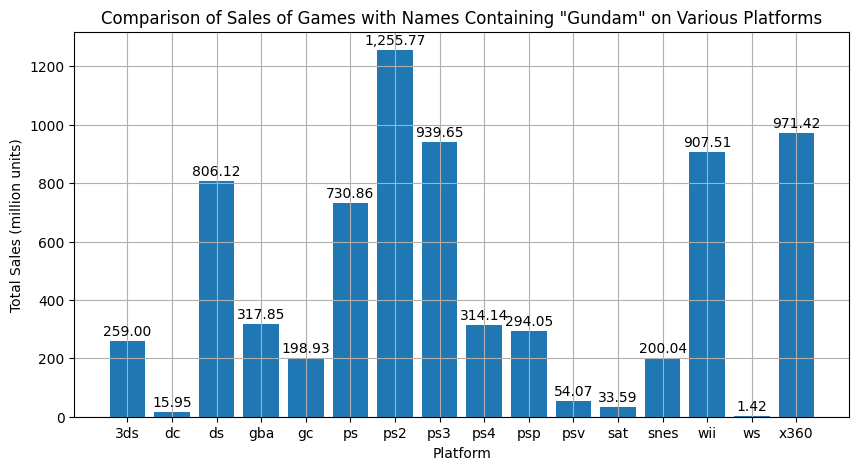

In [67]:
# Filter data for games with names containing 'gundam'
gundam_games = games[games['platform'].isin(gundam_platforms)]

# Retrieve sales information for each platform
gundam_sales_by_platform = gundam_games.groupby('platform')['total_sales'].sum()

# Create a sales comparison chart for 'gundam'
plt.figure(figsize=(10, 5))
plt.bar(gundam_sales_by_platform.index, gundam_sales_by_platform.values)
plt.xlabel('Platform')
plt.ylabel('Total Sales (million units)')
plt.title('Comparison of Sales of Games with Names Containing "Gundam" on Various Platforms')

# Add a value label above each bar
for i in range(len(gundam_sales_by_platform)):
     plt.text(i, gundam_sales_by_platform.values[i] + 20, f'{gundam_sales_by_platform.values[i]:,.2f}', ha='center')

plt.grid(True)
plt.show()

In [68]:
gundam_sales_by_platform

platform
3ds      259.00
dc        15.95
ds       806.12
gba      317.85
gc       198.93
ps       730.86
ps2     1255.77
ps3      939.65
ps4      314.14
psp      294.05
psv       54.07
sat       33.59
snes     200.04
wii      907.51
ws         1.42
x360     971.42
Name: total_sales, dtype: float64

<br>Based on an analysis of sales of games with names containing 'Mario', 'FIFA', and 'Gundam' on various platforms, here is a summary of sales (in millions of units) for each platform:

1. Mario Games:
- The platform with the highest sales is Wii with total sales of around 907.51 million units, followed by DS with total sales of around 806.12 million units.
The platform with the lowest sales is Wii U with total sales of around 82.19 million units.
2. FIFA Games:
- The platform with the highest sales is PS2 with total sales of around 1255.77 million units, followed by X360 with total sales of around 971.42 million units.
The platform with the lowest sales is PS Vita (PSV) with total sales of around 54.07 million units.
3. Gundam Games:
- The platform with the highest sales is PS2 with total sales of around 1255.77 million units, followed by X360 with total sales of around 971.42 million units.
The platform with the lowest sales is WS (WonderSwan) with total sales of around 1.42 million units.

    
<br>In conclusion, various platforms have mixed sales for games with names containing 'Mario', 'FIFA', and 'Gundam'. Platforms such as the Wii, DS, PS2, and X360 have significant sales of these types of games.

<a id='step3.9'></a>
### 3.9 Most Profitable Genres

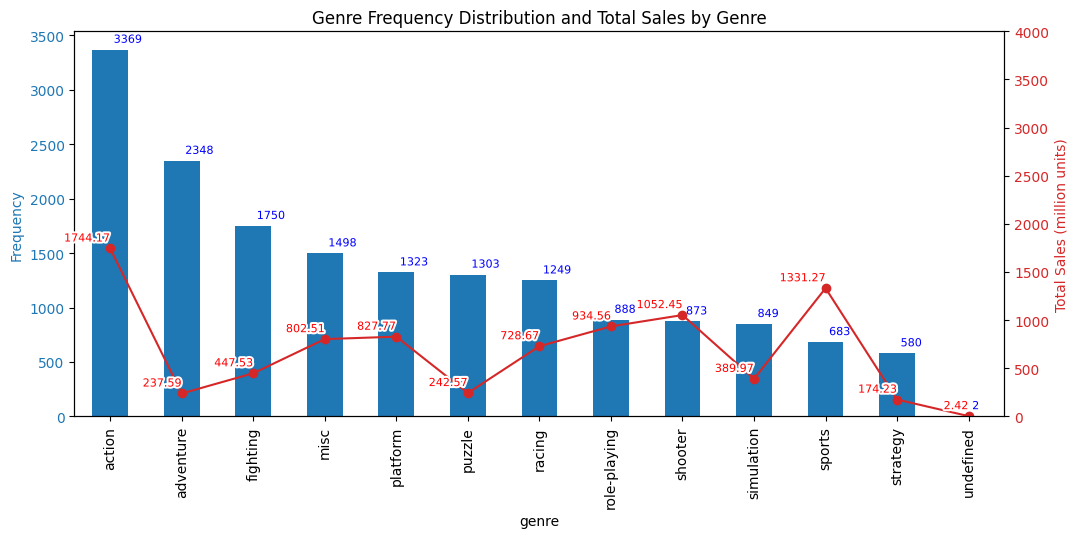

In [69]:
# Calculate total sales for each genre
total_sales_by_genre = games.groupby('genre')['total_sales'].sum()

# Calculate the frequency of each genre
genre_counts = games['genre'].value_counts()

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot for genre frequency
color = 'tab:blue'
ax1.set_xlabel('Genre')
ax1.set_ylabel('Frequency', color=color)
genre_counts.plot(kind='bar', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create the same x-axis for both plots
ax2 = ax1.twinx()

# Plot for total sales
color = 'tab:red'
ax2.set_ylabel('Total Sales (million units)', color=color)
total_sales_by_genre.plot(kind='line', marker='o', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add value labels to the bars
for i, val in enumerate(genre_counts):
     ax1.annotate(f' {val}', (i, val), textcoords="offset points", xytext=(0, 5), ha='left', fontsize=8,
                 color='blue', path_effects=[withStroke(linewidth=3, foreground='white')])

# Add value labels to the lines
for i, val in enumerate(total_sales_by_genre):
     ax2.annotate(f'{val:.2f}', (i, val), textcoords="offset points", xytext=(0, 5), ha='right', fontsize=8,
                  color='red', path_effects=[withStroke(linewidth=3, foreground='white')])

plt.title('Genre Frequency Distribution and Total Sales by Genre')
plt.xticks(rotation=45)
plt.ylim(0, 4000)
plt.show()

<br>The following is an explanation of total sales (in million units) for each genre based on the data provided:

1. Action: The action genre has total sales of around 1744.17 million units, making it one of the highest selling genres.

2. Adventure: The adventure genre has total sales of around 237.59 million units, showing quite high interest from players.

3. Fighting: The fighting genre has total sales of around 447.53 million units. Fighting themed games are quite popular.

4. Misc: The misc (Miscellaneous) genre has total sales of around 802.51 million units. This genre includes a variety of games with diverse themes.

5. Platform: The platform genre has total sales of around 827.77 million units. Platform games are often favorites and have a large sales contribution.

6. Puzzle: The puzzle genre has total sales of around 242.57 million units. Puzzle games also have a strong player base.

7. Racing: The racing genre has total sales of around 728.67 million units. Racing games have always been popular among gamers.

8. Role-Playing: The role-playing genre has total sales of around 934.56 million units. RPGs are a genre that often has loyal fans.

9. Shooter: The shooter genre has total sales of around 1052.45 million units. Shooting games are a very popular genre.

10. Simulation: The simulation genre has total sales of around 389.97 million units. Simulation games have their own charm.

11. Sports: The sports genre has total sales of around 1331.27 million units. Sports games have always attracted gamers.

12. Strategy: The strategy genre has total sales of around 174.23 million units. Strategy games require thinking and planning, appealing to many people.

13. Undefined: The undefined genre has total sales of around 2.42 million units. This category may include games that cannot be classified into a particular genre.

In conclusion, the game genre with the highest sales is sports, followed by action, role-playing, shooter, and platform. However, each genre has a significant contribution to the total sales of the gaming industry.

[Back to Content](#back)

<a id='step4'></a>
## Step 4. Profiling Users For Each Region (NA, EU, JP)

<a id='step4.1'></a>
### 4.1 Top 5 platforms

In [70]:
# Calculates total sales for each platform in each region (NA, EU, JP)
total_sales_by_platform_na = games.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
total_sales_by_platform_eu = games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
total_sales_by_platform_jp = games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

# Taking the top 5 platforms for each region
top_platforms_na = total_sales_by_platform_na.head(5)
top_platforms_eu = total_sales_by_platform_eu.head(5)
top_platforms_jp = total_sales_by_platform_jp.head(5)

# Displays the top platforms in each region
print("Top 5 Platforms in NA Region:")
print(top_platforms_na)
print("\nTop 5 Platforms in the EU Region:")
print(top_platforms_eu)
print("\nTop 5 Platforms in JP Region:")
print(top_platforms_jp)

Top 5 Platforms in NA Region:
platform
x360    602.47
ps2     583.84
wii     496.90
ps3     393.49
ds      382.40
Name: na_sales, dtype: float64

Top 5 Platforms in the EU Region:
platform
ps2     339.29
ps3     330.29
x360    270.76
wii     262.21
ps      213.61
Name: eu_sales, dtype: float64

Top 5 Platforms in JP Region:
platform
ds      175.57
ps      139.82
ps2     139.20
snes    116.55
3ds     100.67
Name: jp_sales, dtype: float64


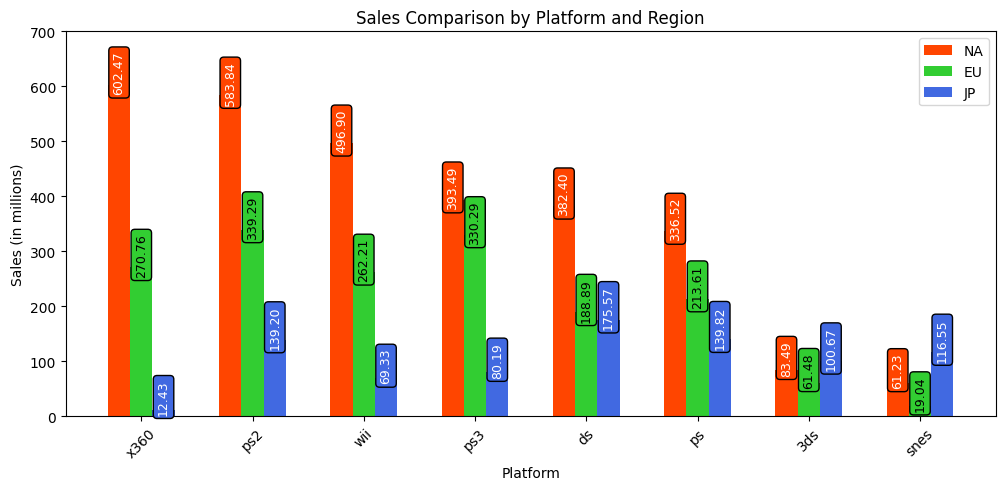

In [71]:
# Data
platforms = ['x360', 'ps2', 'wii', 'ps3', 'ds', 'ps', 'snes', '3ds']
sales_na = [602.47, 583.84, 496.90, 393.49, 382.40, 336.52, 61.23, 83.49] # Total NA sales
sales_eu = [270.76, 339.29, 262.21, 330.29, 188.89, 213.61, 19.04, 61.48] # Total EU sales
sales_jp = [12.43, 139.20, 69.33, 80.19, 175.57, 139.82, 116.55, 100.67] # Total JP sales

# Combine sales data from various regions
sales_by_platform = pd.DataFrame({
     'Platform': platforms,
     'NA Sales': sales_na,
     'EU Sales': sales_eu,
     'JP Sales': sales_jp
})

# Sort by sales in NA region
sales_by_platform_sorted = sales_by_platform.sort_values(by='NA Sales', ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(12, 5))
bar_width = 0.2
index = range(len(platforms))

# Color for each region
colors = ['#FF4500', '#32CD32', '#4169E1'] # Red, Green, Blue

bar1 = ax.bar(index, sales_by_platform_sorted['NA Sales'], bar_width, label='NA', color=colors[0])
bar2 = ax.bar([p + bar_width for p in index], sales_by_platform_sorted['EU Sales'], bar_width, label='EU', color=colors[1])
bar3 = ax.bar([p + bar_width * 2 for p in index], sales_by_platform_sorted['JP Sales'], bar_width, label='JP', color=colors[2])

plt.xlabel('Platform')
plt.ylabel('Sales (in millions)')
plt.title('Sales Comparison by Platform and Region')
plt.xticks([p + bar_width for p in index], sales_by_platform_sorted['Platform'], rotation=45)
plt.legend()

# Adding labels to each bar with 90-degree rotation and matching font color to the bar color
for bars, color in zip([bar1, bar2, bar3], colors):
     for p in bars:
         # Convert hex color to RGB format
         rgb_color = [int(color[i:i+2], 16) / 255.0 for i in (1, 3, 5)]
         luminance = 0.299 * rgb_color[0] + 0.587 * rgb_color[1] + 0.114 * rgb_color[2] # Calculate luminance

         # Determine label text color based on luminance
         text_color = 'black' if luminance > 0.5 else 'white'

         ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=9, color=text_color,
                     xytext=(0, 9), textcoords='offset points', rotation=90,
                     bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor=color))

plt.ylim(0, 700)
plt.show()

<br>Based on total sales data (in millions of units) for each platform in North America (na_sales), Europe (eu_sales), and Japan (jp_sales), here are some conclusions:

1. Sales in North America (na_sales):
- Xbox 360 (x360): 602.47 million units
- PlayStation 2 (ps2): 583.84 million units
- Wii: 496.90 million units
- PlayStation 3 (ps3): 393.49 million units
- Nintendo DS (ds): 382.40 million units
2. Sales in Europe (eu_sales):
- PlayStation 2 (ps2): 339.29 million units
- PlayStation 3 (ps3): 330.29 million units
- Xbox 360 (x360): 270.76 million units
- Wii: 262.21 million units
- PlayStation (ps): 213.61 million units
3. Sales in Japan (jp_sales):
- Nintendo DS (ds): 175.57 million units
- PlayStation (ps): 139.82 million units
- PlayStation 2 (ps2): 139.20 million units
- Super Nintendo Entertainment System (snes): 116.55 million units
- Nintendo 3DS (3ds): 100.67 million units

    
<br>Conclusion: Xbox 360 dominates sales in North America, PlayStation 2 is the top platform in Europe, and Nintendo DS is the top in Japan. However, there are differences in platform preferences between regions that need to be considered in global marketing strategies.

<a id='step4.2'></a>
### 4.2 Top 5 Genres

In [72]:
# Calculates total sales for each genre in each region
total_sales_by_genre_na = games.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
total_sales_by_genre_eu = games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
total_sales_by_genre_jp = games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

# Taking the top 5 genres for each region
top_genres_na = total_sales_by_genre_na.head(5)
top_genres_eu = total_sales_by_genre_eu.head(5)
top_genres_jp = total_sales_by_genre_jp.head(5)

# Displays the top 5 genres in each region
print("Top 5 Genres in NA Region:")
print(top_genres_na)
print("\nTop 5 Genres in the EU Region:")
print(top_genres_eu)
print("\nTop 5 Genres in JP Region:")
print(top_genres_jp)

Top 5 Genres in NA Region:
genre
action      879.01
sports      684.43
shooter     592.24
platform    445.50
misc        407.27
Name: na_sales, dtype: float64

Top 5 Genres in the EU Region:
genre
action     519.13
sports     376.79
shooter    317.34
racing     236.51
misc       212.74
Name: eu_sales, dtype: float64

Top 5 Genres in JP Region:
genre
role-playing    355.41
action          161.43
sports          135.54
platform        130.83
misc            108.11
Name: jp_sales, dtype: float64


In [73]:
# Group by platform and calculate total sales
sales_per_genre_3 = games.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Sort
sales_per_genre_3.sort_values(by='na_sales', ascending=False)

# Displays total sales per platform
sales_per_genre_3

,na_sales,eu_sales,jp_sales
genre,,,
action,879.01,519.13,161.43
adventure,105.26,63.54,52.30
fighting,223.36,100.33,87.48
misc,407.27,212.74,108.11
platform,445.50,200.35,130.83
puzzle,122.87,50.01,57.31
racing,359.35,236.51,56.71
role-playing,330.81,188.71,355.41
shooter,592.24,317.34,38.76


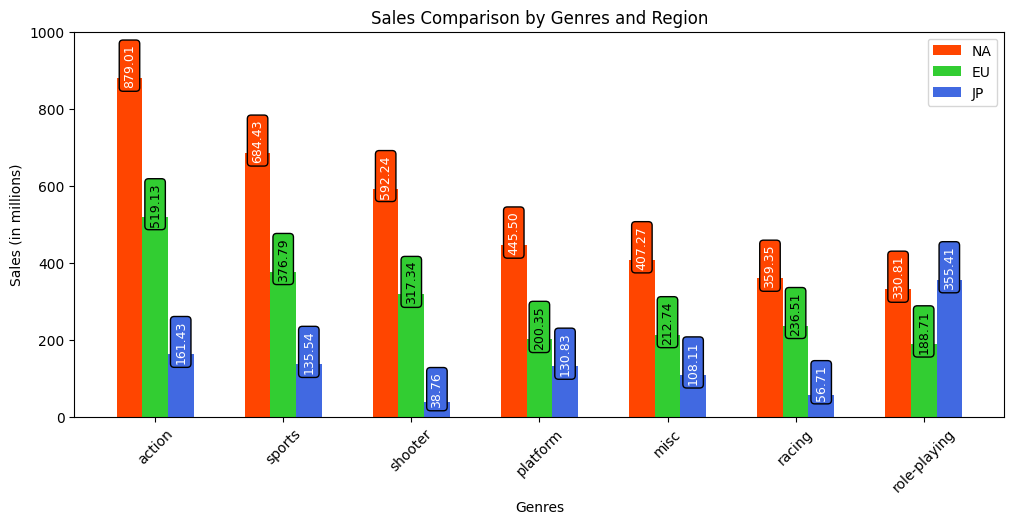

In [74]:
# Data
genre = ['action', 'sports', 'shooter', 'platform', 'misc', 'racing', 'role-playing']
na_sales = [879.01, 684.43, 592.24, 445.50, 407.27, 359.35, 330.81]
eu_sales = [519.13, 376.79, 317.34, 200.35, 212.74, 236.51, 188.71]
jp_sales = [161.43, 135.54, 38.76, 130.83, 108.11, 56.71, 355.41]

# Combine sales data from various regions
sales_by_genre = pd.DataFrame({
     'Genres': genre,
     'NA Sales': na_sales,
     'EU Sales': eu_sales,
     'JP Sales': jp_sales
})

# Sort by sales in NA region
sales_by_genre_sorted = sales_by_genre.sort_values(by='NA Sales', ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(12, 5))
bar_width = 0.2
index = range(len(genre))

# Color for each region
colors = ['#FF4500', '#32CD32', '#4169E1'] # Red, Green, Blue

bar1 = ax.bar(index, sales_by_genre_sorted['NA Sales'], bar_width, label='NA', color=colors[0])
bar2 = ax.bar([p + bar_width for p in index], sales_by_genre_sorted['EU Sales'], bar_width, label='EU', color=colors[1])
bar3 = ax.bar([p + bar_width * 2 for p in index], sales_by_genre_sorted['JP Sales'], bar_width, label='JP', color=colors[2])

plt.xlabel('Genres')
plt.ylabel('Sales (in millions)')
plt.title('Sales Comparison by Genres and Region')
plt.xticks([p + bar_width for p in index], sales_by_genre_sorted['Genres'], rotation=45)
plt.legend()

# Adding labels to each bar with 90-degree rotation and matching font color to the bar color
for bars, color in zip([bar1, bar2, bar3], colors):
     for p in bars:
         # Convert hex color to RGB format
         rgb_color = [int(color[i:i+2], 16) / 255.0 for i in (1, 3, 5)]
         luminance = 0.299 * rgb_color[0] + 0.587 * rgb_color[1] + 0.114 * rgb_color[2] # Calculate luminance

         # Determine label text color based on luminance
         text_color = 'black' if luminance > 0.5 else 'white'

         ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=9, color=text_color,
                     xytext=(0, 9), textcoords='offset points', rotation=90,
                     bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor=color))

plt.ylim(0, 1000)
plt.show()

<br>Based on total sales per genre in NA, EU, and JP regions, here are the conclusions for the top 5 genres in each region:

1. NA Region:
- Action: Total NA sales of 879.01 million copies.
- Sports: Total NA sales of 684.43 million copies.
- Shooter: Total NA sales of 592.24 million copies.
- Platform: Total NA sales of 445.50 million copies.
- Misc: Total NA sales were 407.27 million copies.
2. EU Region:
- Action: Total EU sales of 519.13 million copies.
- Sports: Total EU sales of 376.79 million copies.
- Shooter: Total EU sales of 317.34 million copies.
- Racing: Total EU sales of 236.51 million copies.
- Misc: Total EU sales of 212.74 million copies.
3. JP Region:
- Role-Playing: Total JP sales of 355.41 million copies.
- Action: Total sales of JP were 161.43 million copies.
- Sports: Total sales of JP were 135.54 million copies.
- Platform: Total JP sales of 130.83 million copies.
- Misc: Total sales of JP were 108.11 million copies.

    
<br>The "Action" genre dominates total sales in the NA and EU Regions, while in the JP Region, the "Role-Playing" genre is the most popular. These differences in genre preferences can provide strategic insight for the video game industry in designing and marketing their games in different regions.

<a id='step4.3'></a>
### 4.3 ESRB Ratings

In [75]:
# Group by platform and calculate total sales
sales_per_rating_3 = games.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Displays total sales per platform
sales_per_rating_3

,na_sales,eu_sales,jp_sales
rating,,,
AO,1.26,0.61,0.00
E,1996.83,1070.42,606.42
E10+,353.32,188.52,40.20
EC,1.53,0.11,0.00
K-A,2.56,0.27,1.46
M,872.25,528.71,83.85
RP,0.00,0.08,0.00
T,1172.82,635.42,565.41


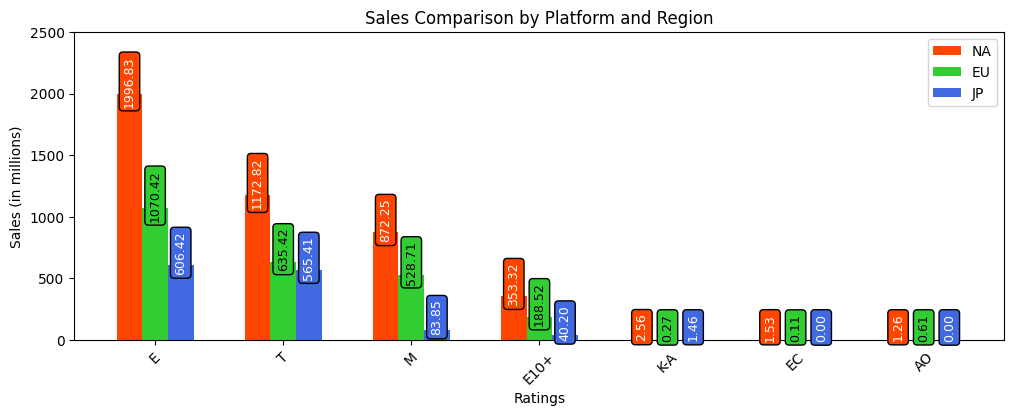

In [76]:
# Data
rating = ['E', 'T', 'M', 'E10+', 'AO', 'EC', 'K-A']
na_sales = [1996.83, 1172.82, 872.25, 353.32, 1.26, 1.53, 2.56]
eu_sales = [1070.42, 635.42, 528.71, 188.52, 0.61, 0.11, 0.27]
jp_sales = [606.42, 565.41, 83.85, 40.20, 0.00, 0.00, 1.46]

# Combine sales data from various regions
sales_by_rating = pd.DataFrame({
     'Ratings': rating,
     'NA Sales': na_sales,
     'EU Sales': eu_sales,
     'JP Sales': jp_sales
})

# Sort by sales in NA region
sales_by_rating_sorted = sales_by_rating.sort_values(by='NA Sales', ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(12, 4))
bar_width = 0.2
index = range(len(rating))

# Color for each region
colors = ['#FF4500', '#32CD32', '#4169E1'] # Red, Green, Blue

bar1 = ax.bar(index, sales_by_rating_sorted['NA Sales'], bar_width, label='NA', color=colors[0])
bar2 = ax.bar([p + bar_width for p in index], sales_by_rating_sorted['EU Sales'], bar_width, label='EU', color=colors[1])
bar3 = ax.bar([p + bar_width * 2 for p in index], sales_by_rating_sorted['JP Sales'], bar_width, label='JP', color=colors[2])

plt.xlabel('Ratings')
plt.ylabel('Sales (in millions)')
plt.title('Sales Comparison by Platform and Region')
plt.xticks([p + bar_width for p in index], sales_by_rating_sorted['Ratings'], rotation=45)
plt.legend()

# Adding labels to each bar with 90-degree rotation and matching font color to the bar color
for bars, color in zip([bar1, bar2, bar3], colors):
     for p in bars:
         # Convert hex color to RGB format
         rgb_color = [int(color[i:i+2], 16) / 255.0 for i in (1, 3, 5)]
         luminance = 0.299 * rgb_color[0] + 0.587 * rgb_color[1] + 0.114 * rgb_color[2] # Calculate luminance

         # Determine label text color based on luminance
         text_color = 'black' if luminance > 0.5 else 'white'

         ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=9, color=text_color,
                     xytext=(0, 9), textcoords='offset points', rotation=90,
                     bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor=color))

plt.ylim(0, 2500)
plt.show()

<br>The following is a comparison of sales for the top 5 top ratings in each region:

1. NA Region:
- 'E' rating: approximately 1996.83 million units.
- 'M' rating: approximately 872.25 million units.
- 'T' rating: approximately 1172.82 million units.
- 'E10+' rating: approximately 353.32 million units.
- 'AO' rating: approximately 1.26 million units.
2. EU Region:
- 'E' rating: approximately 1070.42 million units.
- 'T' rating: approximately 635.42 million units.
- 'M' rating: approximately 528.71 million units.
- 'E10+' rating: approximately 188.52 million units.
- 'AO' rating: approximately 0.61 million units.
3. JP Region:
- 'E' rating: approximately 606.42 million units.
- 'T' rating: approximately 565.41 million units.
- 'M' rating: approximately 83.85 million units.
- 'E10+' rating: approximately 40.20 million units.
- 'K-A' rating: approximately 1.46 million units.

    
<br>At first glance, the striking difference is that in the NA region, the 'E' rating has very high sales compared to the EU and JP regions. In addition, sales of the 'AO' rating are also quite low in all regions. However, a more in-depth comparison may be necessary to gain more complete insight.

[Back to Content](#back)

<a id='step5'></a>
## Step 5. Hypothesis Testing

<a id='step5.1'></a>
### 5.1 Average user ratings for Xbox One and PC platforms are the same

In [77]:
# Retrieves user rating data for Xbox One and PC
ratings_xbox = games[games['platform'] == 'xone']['user_score'].dropna()
ratings_pc = games[games['platform'] == 'pc']['user_score'].dropna()

# Perform Levene's test
statistics, pvalue = stats.levene(ratings_xbox, ratings_pc, center='median')

# Displays Levene test results
print('Levene test results:')
print('Statistics:', statistics)
print('P-value:', pvalue)

# Interpretation of Levene test results
alpha = 0.05 # Significance level
if pvalue < alpha:
     print('Conclusion: There is statistical evidence that the variances are not equal (reject the null hypothesis).')
else:
     print('Conclusion: There is not enough statistical evidence to conclude that the variances are different (do not reject the null hypothesis).')

Levene test results:
Statistics: 1.2212506384014863
P-value: 0.2693951512047048
Conclusion: There is not enough statistical evidence to conclude that the variances are different (do not reject the null hypothesis).


In [78]:
# Perform an independent t test
t_statistic, p_value = stats.ttest_ind(ratings_xbox, ratings_pc, equal_var=True) # equal_var=True because variances are equal

# Displays independent t test results
print('Independent t test results:')
print('T-Statistic:', t_statistic)
print('P-value:', p_value)

# Interpretation of independent t test results
alpha = 0.05 # Significance level
if p_value < alpha:
     print('Conclusion: There are significant differences between the Xbox One and PC platforms.')
else:
     print('Conclusion: There is no significant difference between the Xbox One and PC platforms.')

Independent t test results:
T-Statistic: -4.368333815003015
P-value: 1.3896435533548819e-05
Conclusion: There are significant differences between the Xbox One and PC platforms.


<b>Explanation</b> <a class="tocSkip"></a>
<br>Based on the results of the independent t test (t-test) with variances considered equal (equal_var=True), the T-Statistic is -4.368333815003015 and the P-value is around 1.3896435533548819e-05. The P-value is very small, much smaller than the significance level of alpha=0.05.

<br>Because the P-value is very small and smaller than alpha, we can conclude that there is a significant difference between the Xbox One and PC platforms in terms of user ratings. This means that there is enough statistical evidence to suggest that the average user ratings between Xbox One and PC are significantly different.

<a id='step5.2'></a>
### 5.2 Average user ratings for the Action and Sports genres are different

In [79]:
# Retrieve user rating data for the Action and Sports genres
ratings_action = games[games['genre'] == 'action']['user_score'].dropna()
ratings_sports = games[games['genre'] == 'sports']['user_score'].dropna()

# Perform Levene's test
statistics, pvalue = stats.levene(ratings_action, ratings_sports, center='median')

# Displays Levene test results
print('Levene test results:')
print('Statistics:', statistics)
print('P-value:', pvalue)

# Interpretation of Levene test results
alpha = 0.05 # Significance level
if pvalue < alpha:
     print('Conclusion: There is statistical evidence that the variances are not equal (reject the null hypothesis).')
else:
     print('Conclusion: There is not enough statistical evidence to conclude that the variances are different (do not reject the null hypothesis).')

Levene test results:
Statistics: 14.132896085177192
P-value: 0.0001736640672727649
Conclusion: There is statistical evidence that the variances are not equal (reject the null hypothesis).


In [80]:
# Perform an independent t test with unequal variances
t_statistic, p_value = stats.ttest_ind(ratings_action, ratings_sports, equal_var=False)

# Displays independent t test results
print('Independent t test results:')
print('T-Statistic:', t_statistic)
print('P-value:', p_value)

# Interpretation of independent t test results
alpha = 0.05 # Significance level
if p_value < alpha:
     print('Conclusion: There are significant differences between the Action and Sports genres.')
else:
     print('Conclusion: There is no significant difference between the Action and Sports genres.')

Independent t test results:
T-Statistic: 1.57746791633354
P-value: 0.11483818791498286
Conclusion: There is no significant difference between the Action and Sports genres.


<b>Explanation</b> <a class="tocSkip"></a>
<br>Based on the results of the independent t test taking into account unequal variances, the t-statistic value was around 1.58 and the p-value was around 0.115. The p-value is greater than the generally used significance level (α = 0.05).

<br>Because the p-value is greater than the significance level (α), we do not have enough statistical evidence to reject the null hypothesis. Therefore, the conclusions that can be drawn are:

<br>Conclusion: There is no significant difference between the average user rating (user_score) for the Action and Sports genres.

<br>In this context, "no significant difference" means that based on existing data, there is not sufficient statistical evidence to support a significant difference in average user ratings between the Action and Sports genres

[Back to Content](#back)

<a id='step6'></a>
## Step 6. General Conclusion

**PS2 Sales Trends:**
Sales of the PlayStation 2 (PS2) experienced significant growth from 2000 to 2001, peaking in 2004, then experiencing a gradual decline until 2011. This is consistent with the general life cycle of game consoles.

**Popular Platforms That Are Now Shrinking:**
Several platforms such as PS3, Xbox 360 (x360), Wii U, PC, 3DS, and PS Vita (psv) were once popular but are currently experiencing a decline in sales. Meanwhile PS4 and Xbox One (XOne) are platforms that are still developing.

**Platform Potential for Profit:**
Platforms such as PS4, Xbox One (XOne), 3DS, Wii U, and PS Vita (psv) have the potential to generate profits because they have an average platform age of around 9.25 years and were produced between 2010-2012.

**PC Role:**
PCs have a very long lifespan (more than 31 years) and continue to grow because they can be used to play various games from other platforms and even for game development.

**Average Sales per Game and Platform Age:**
Average sales per game and platform lifespan are important factors in assessing a platform's long-term potential and success.

**Sales By Genre:**
The highest selling genre is sports, followed by action, role-playing, shooter and platform. Each genre has a significant contribution to the total sales of the gaming industry.

**Sales Comparison by Region:**
Platform and genre preferences can vary between regions, such as the dominance of the Xbox 360 in North America, the PS2 in Europe, and the Nintendo DS in Japan.

**Sales Comparison Based on Rating:**
The 'E' (Everyone) rating dominates sales globally, especially in North America. Sales of the 'AO' (Adults Only) rating are quite low across all regions.

**Statistic analysis:**
There is sufficient statistical evidence to suggest that the average user ratings between Xbox One and PC are significantly different. There is also not enough statistical evidence to support a significant difference in average user ratings between the Action and Sports genres.
    
In conclusion, platform and game sales trends are influenced by various factors such as technological innovation, product life cycle, market preferences, and marketing strategies. To maximize profit potential, a deep understanding of the market and quick adaptation to changes are the keys to success in the gaming industry.

[Back to Content](#back)